# Step-wise comparison AoB2015
The results from Schymanski et al. (2015) are used as a benchmark and starting point from the current analysis. Several adjustmens have been made in the general set-up of the model, the effects of these choices are assessed in a stepwise approach:

0. Benchmark data
1. Reproducing benchmark results
2. Repeat SCE with input data AoB2015
3. Change the modelling period
4. Change atmospheric CO$_2$ to MaunaLoa records
5. Change soil layer thickness
6. Change atmospheric pressure from fixed to variable
7. Add rooting depth grasses as optimizable property
8. Change costfactor for water transport
9. Update the weatherdata with new SILO-data
10. New soil parameters and hydrology


## Reproducing benchmark results
Here, the vegetation properties are not re-optimized and the outputs of the optimization of Schymanski et al. (2015) are used. Both model runs should there produce similar results. 


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook


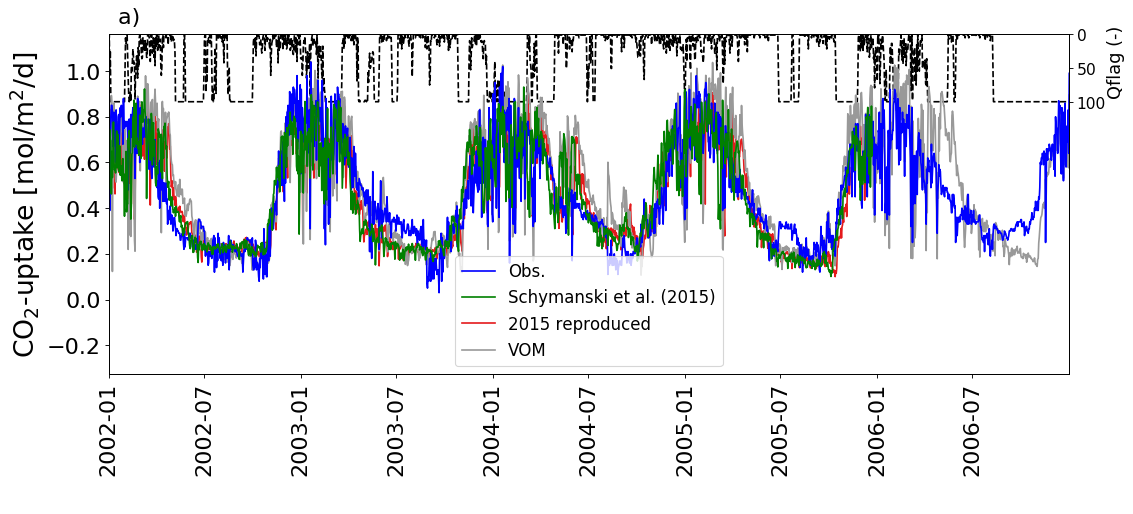

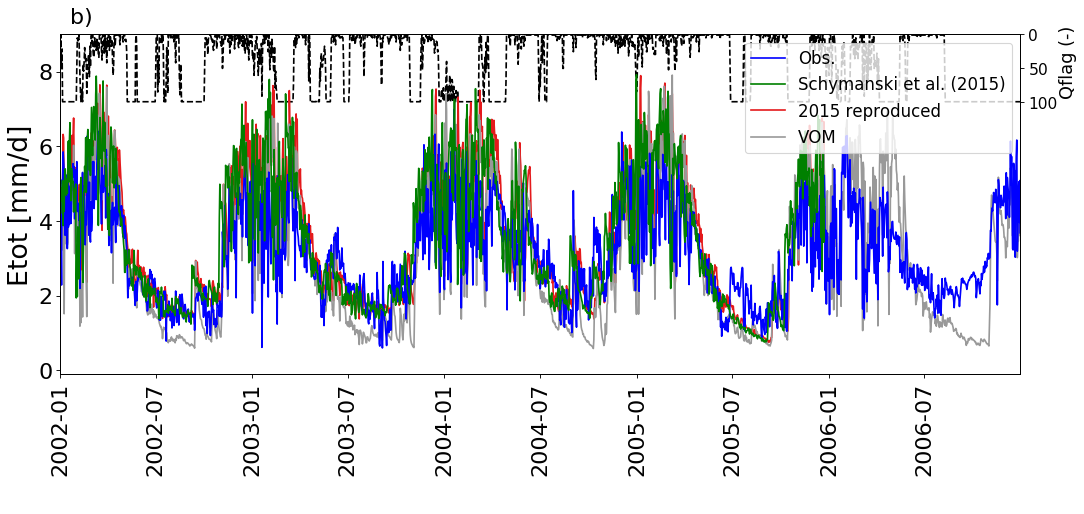

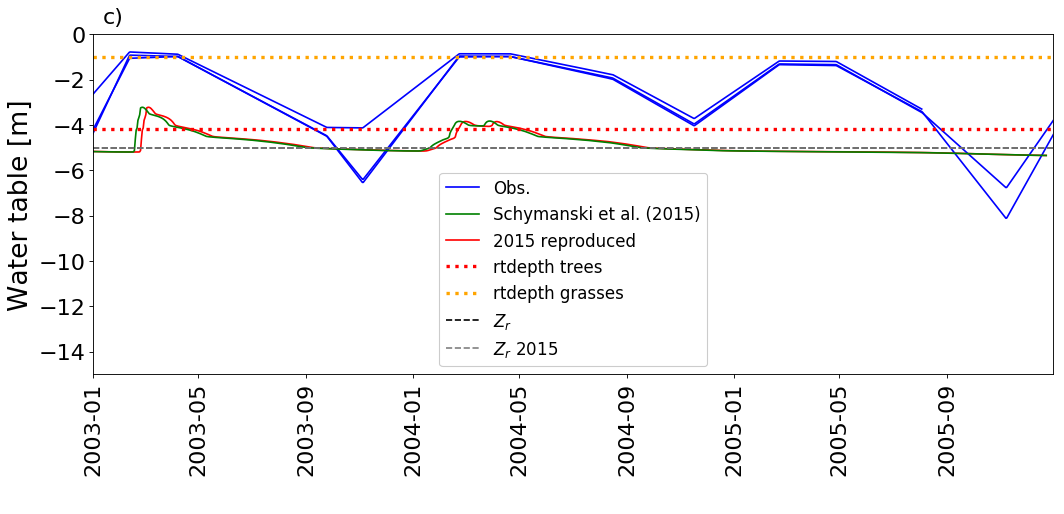

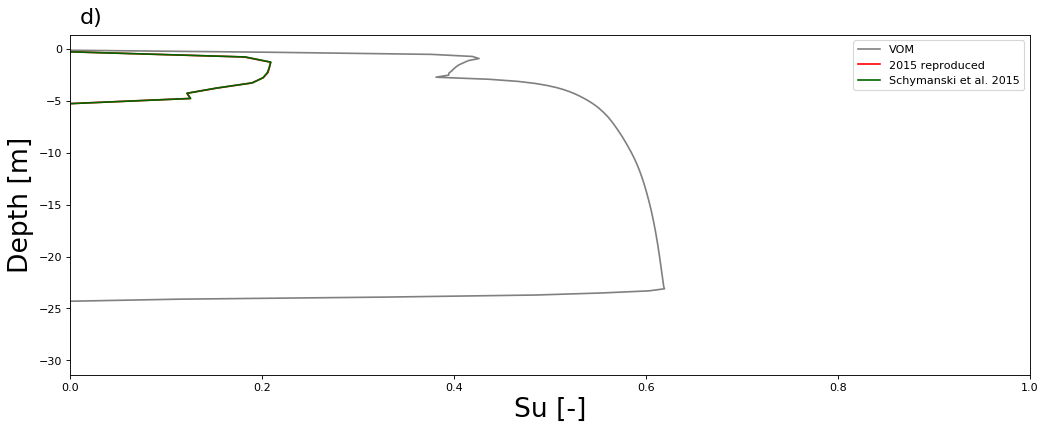

In [44]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "2015 reproduced" "VOM" --title "a) " --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt\
--palette Set1 

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "2015 reproduced" "VOM" --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt\
--palette Set1 

#groundwater
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt\
--depth True -ys 2003 -ye 2005  --ylim -15 0\
--ylabel "Water table [m]"  \
--labels VOM \
--colors "red"\
--i_cz 15 \
--i_zr 10 \
--i_cz2015 15 \
--i_zr2015 10 \
--obs ../../data/boreholes/RN030982.csv \
../../data/boreholes/RN030983.csv \
../../data/boreholes/RN030984.csv \
--pars ../../data/VOM_input/HowardSprings/1_benchmark_repr/pars.txt \
--labels "2015 reproduced" "VOM"  --title "c)" --legend True

#soil moisture profile
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
-d 0.20 0.50 0.50 \
-cz 30 15 15 -nd 3650 --ylabel "Depth [m]" --xlabel "Su [-]" --cbar_min 0.10 --cbar_max 1.00 \
--cblabel "Layer thickness [m]" --plot_cbar 0 --xlim 0 1 \
--label "VOM" "2015 reproduced" "Schymanski et al. 2015" --title "d)" \
--colors "gray" "red" "darkgreen"


**Figure S1.1.** Comparison for Howard Springs between the results of Schymanski et al. (2015) (green) and a reproduction of those results (red) based on the best run of the SCE-algorithm from Schymanski et al. (2015), for a) assimilation and b) evaporation c) groundwater tables and c) the average soil moisture profile. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 
The results should therefore be completely identical. This is mostly the case, except for a small shift due to un-even years, which was not taken into account in the original data.

## Repeat SCE
The vegetation properties are re-optimized with the same settings, inputs and parameter ranges as Schymanski et al. (2015). The results should therefore be similar.

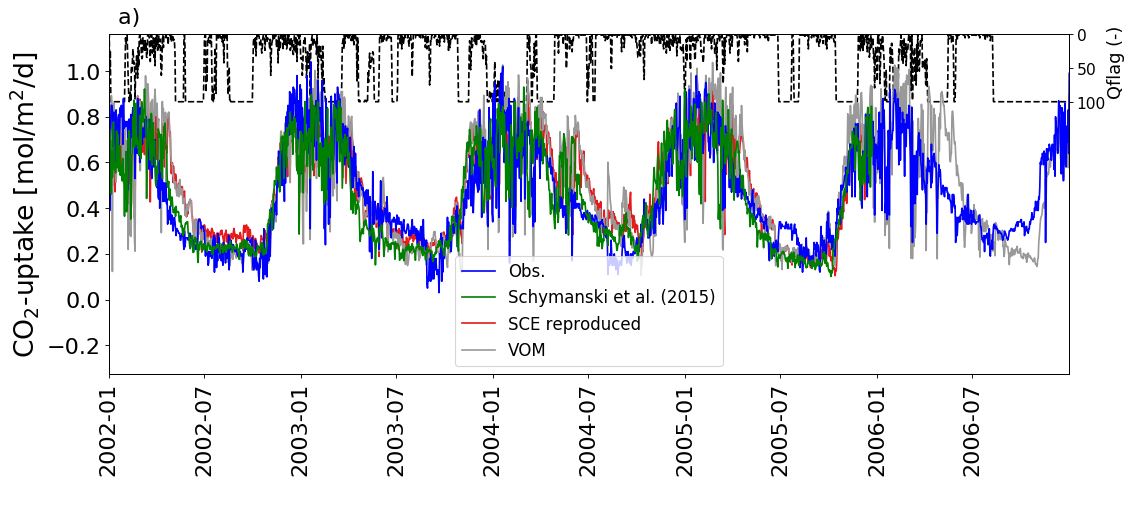

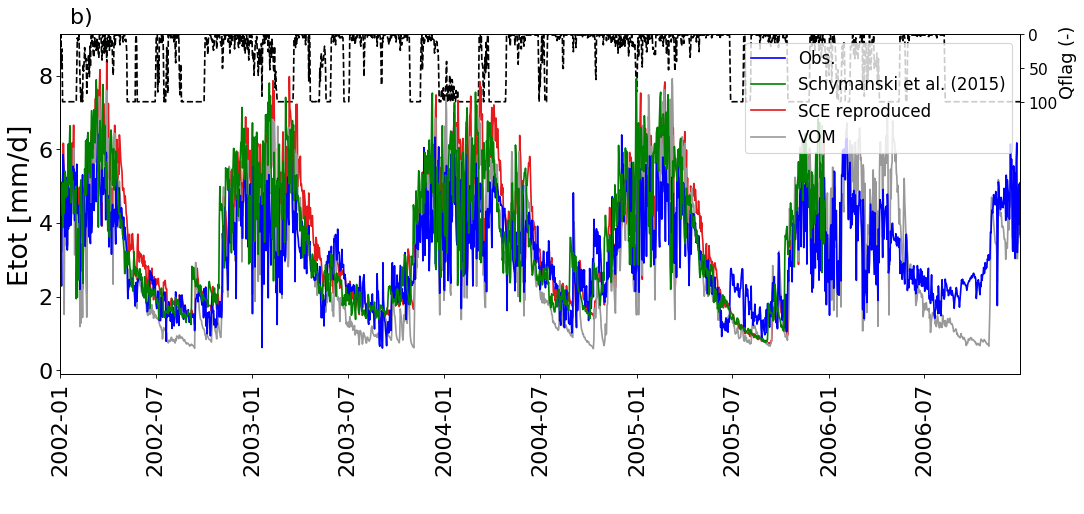

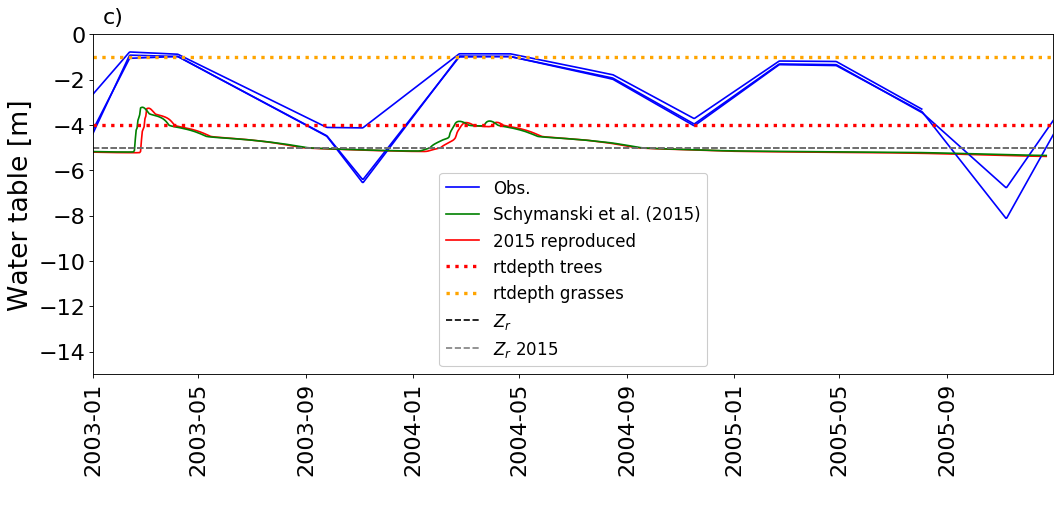

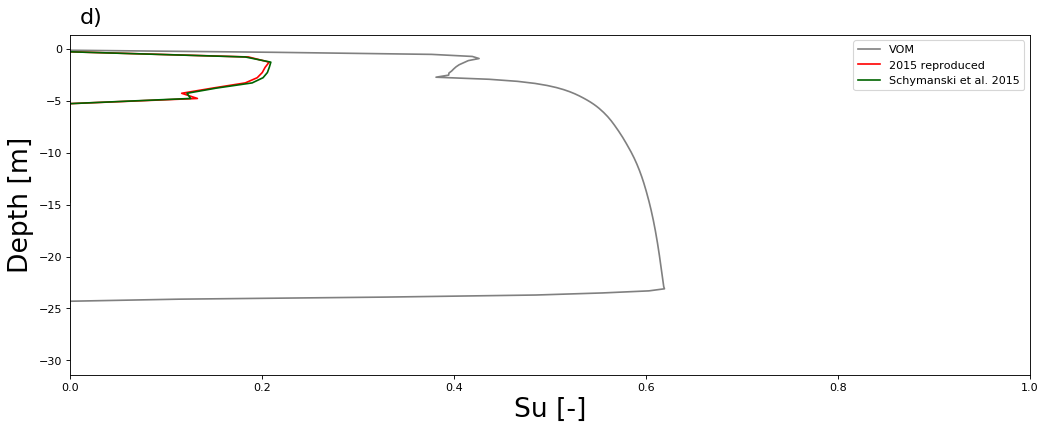

In [45]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "SCE reproduced" "VOM" --title "a) " --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--palette Set1 

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "SCE reproduced" "VOM" --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt \
--palette Set1 

#groundwater
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt\
--depth True -ys 2003 -ye 2005  --ylim -15 0\
--ylabel "Water table [m]"  \
--labels VOM \
--colors "red"\
--i_cz 15 \
--i_zr 10 \
--i_cz2015 15 \
--i_zr2015 10 \
--obs ../../data/boreholes/RN030982.csv \
../../data/boreholes/RN030983.csv \
../../data/boreholes/RN030984.csv \
--pars ../../work/additional_analyses/comp2015/2_sce_check/best/input/pars.txt \
--labels "2015 reproduced" "VOM"  --title "c)" --legend True

#soil moisture profile
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
-d 0.20 0.50 0.50 \
-cz 30 15 15 -nd 3650 --ylabel "Depth [m]" --xlabel "Su [-]" --cbar_min 0.10 --cbar_max 1.00 \
--cblabel "Layer thickness [m]" --plot_cbar 0 --xlim 0 1 \
--label "VOM" "2015 reproduced" "Schymanski et al. 2015" --title "d)" \
--colors "gray" "red" "darkgreen"




**Figure S1.2.** Comparison for Howard Springs between the results of Schymanski et al. (2015) (green) and reproduced results (red) by repeating the SCE-algorithm with the same settings and parameterization of Schymanski et al. (2015), for a) assimilation, b) evaporation, c) groundwater tables and d) the average soil moisture profile. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 
The differences between the results of Schymanski et al. (2015) and the reproduced results are minor, but a shift due to un-even years remains. The soil moisture profiles are almost identical.

## Change of modelling period
The model runs of Schymanski et al. (2015) were run from 1976 untill 2005, whereas the new runs start from 1980 untill 2017.


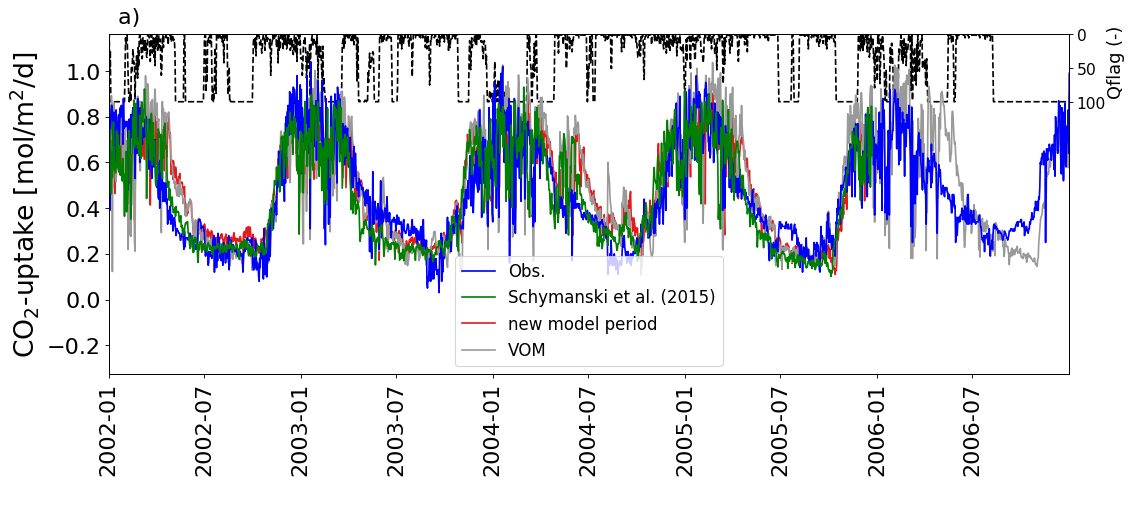

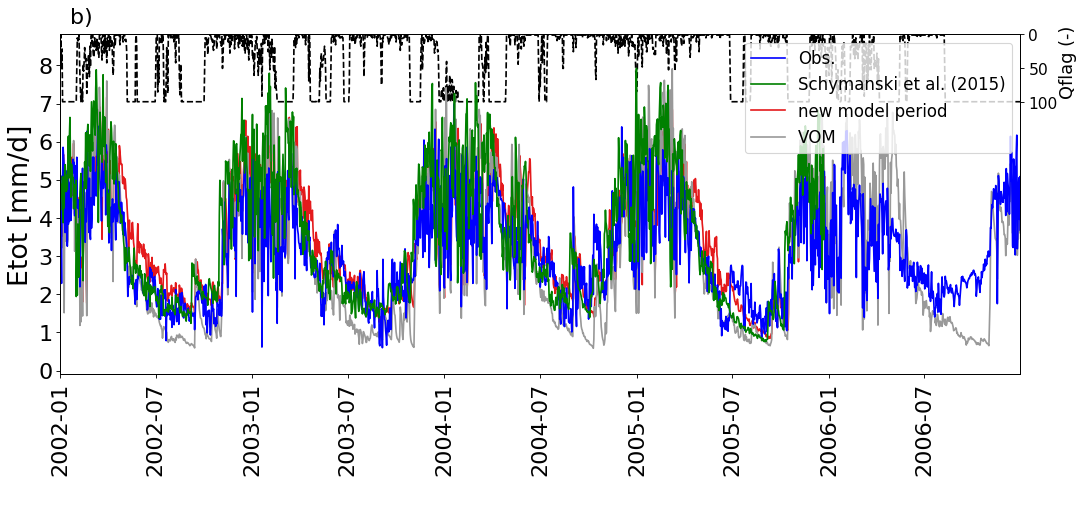

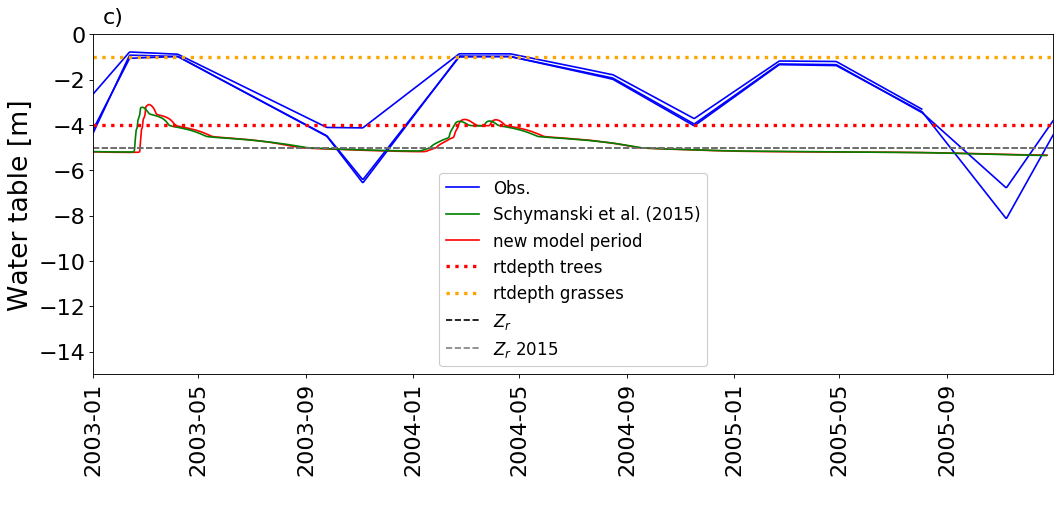

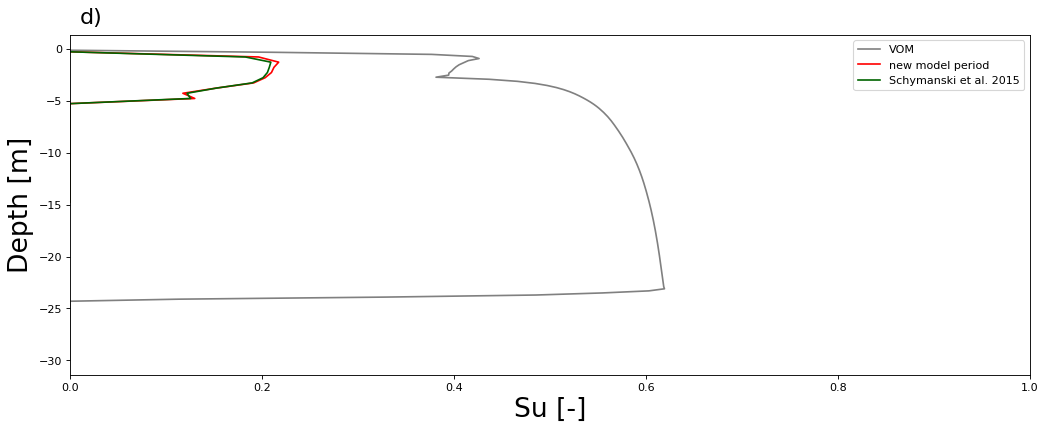

In [46]:
#results still on HPC

#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/3_modeltime/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "new model period" "VOM" --title "a) " --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--palette Set1

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/3_modeltime/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]"  \
--labels "new model period" "VOM"  --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt \
--palette Set1

#groundwater
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/additional_analyses/comp2015/3_modeltime/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt\
--depth True -ys 2003 -ye 2005  --ylim -15 0\
--ylabel "Water table [m]"  \
--labels VOM \
--colors "red"\
--i_cz 15 \
--i_zr 10 \
--i_cz2015 15 \
--i_zr2015 10 \
--obs ../../data/boreholes/RN030982.csv \
../../data/boreholes/RN030983.csv \
../../data/boreholes/RN030984.csv \
--pars ../../work/additional_analyses/comp2015/3_modeltime/best/input/pars.txt \
--labels "new model period" "VOM"  --title "c)" --legend True

#soil moisture profile
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/3_modeltime/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
-d 0.20 0.50 0.50 \
-cz 30 15 15 -nd 3650 --ylabel "Depth [m]" --xlabel "Su [-]" --cbar_min 0.10 --cbar_max 1.00 \
--cblabel "Layer thickness [m]" --plot_cbar 0 --xlim 0 1 \
--label "VOM" "new model period" "Schymanski et al. 2015" --title "d)" \
--colors "gray" "red" "darkgreen"


**Figure S1.3.** Comparison for Howard Springs between the results of Schymanski et al. (2015), where the model period was set from 1976 untill 2005, and new runs that start from 1980 untill 2017, with a) assimilation, b) evaporation, c) groundwater tables and c) the average soil moisture profile. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 
Small differences can be observed, but in a similar order of magnitude as when the SCE-algorithm is re-run (see Figure S1.2).The soil moisture profiles are almost identical again.


## Change of atmospheric CO$_2$-values
Comparison for Howard Springs between the result of Schymanski et al. (2015), where atmospheric CO$_2$-values were fixed at 317ppm and new runs that use the MaunaLoa-records as input with variable CO$_2$-levels.

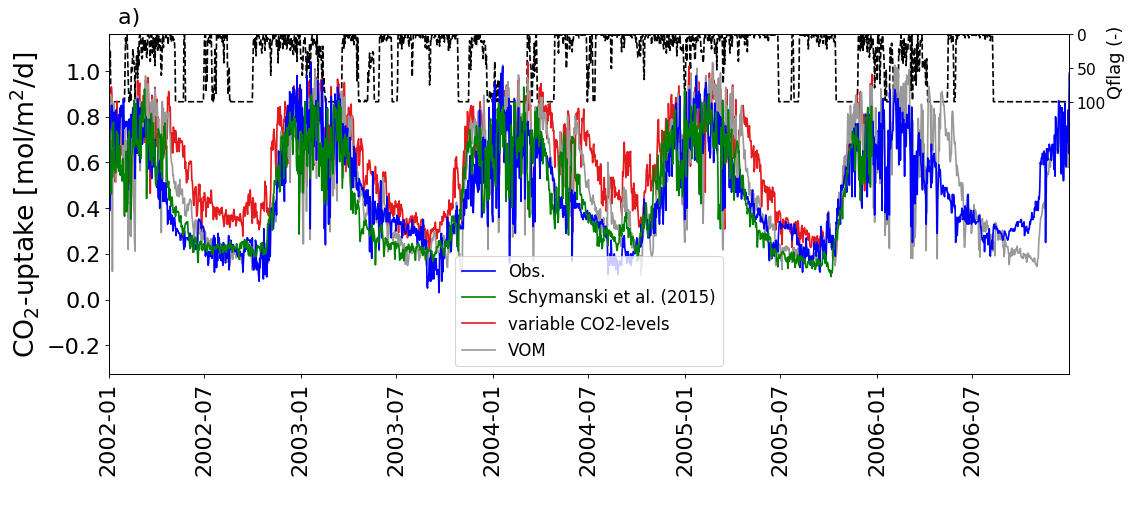

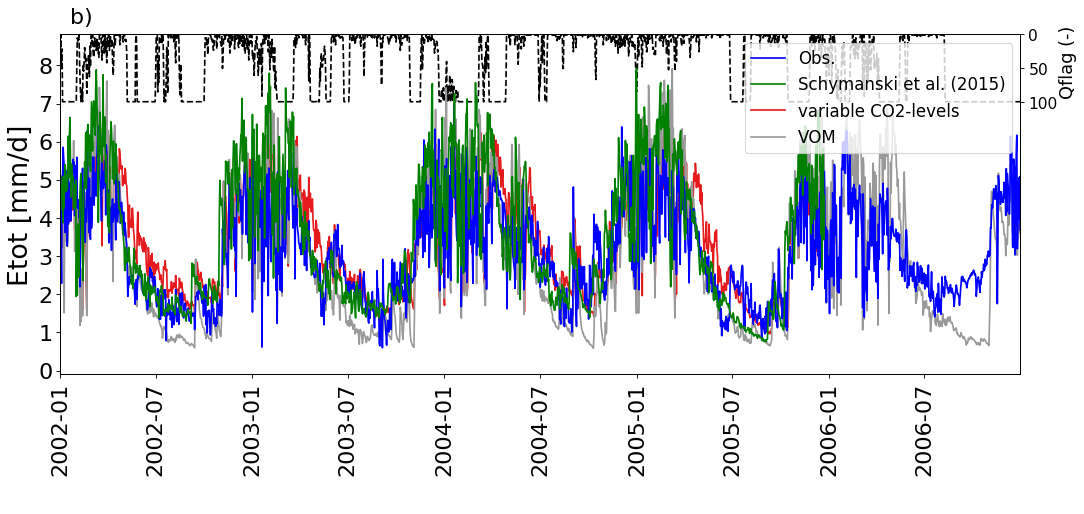

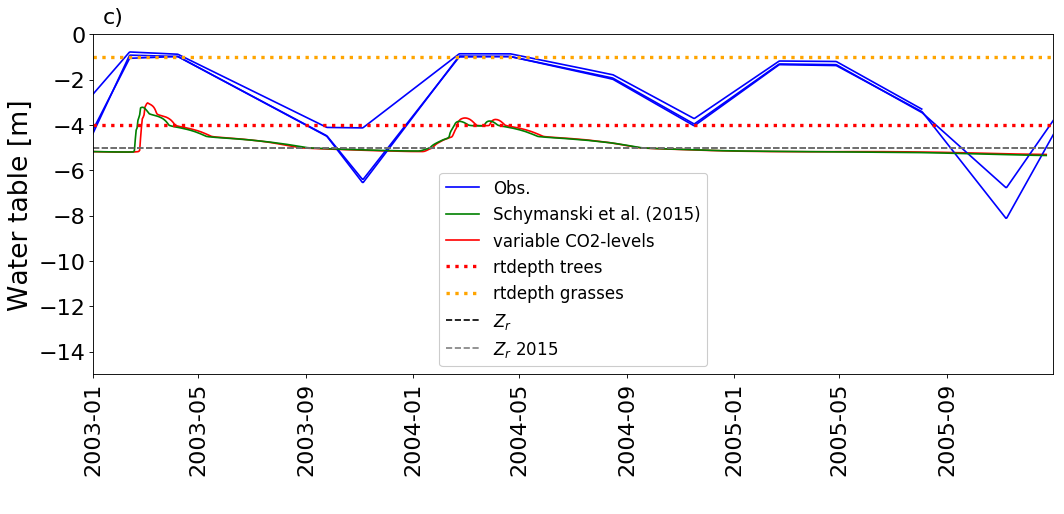

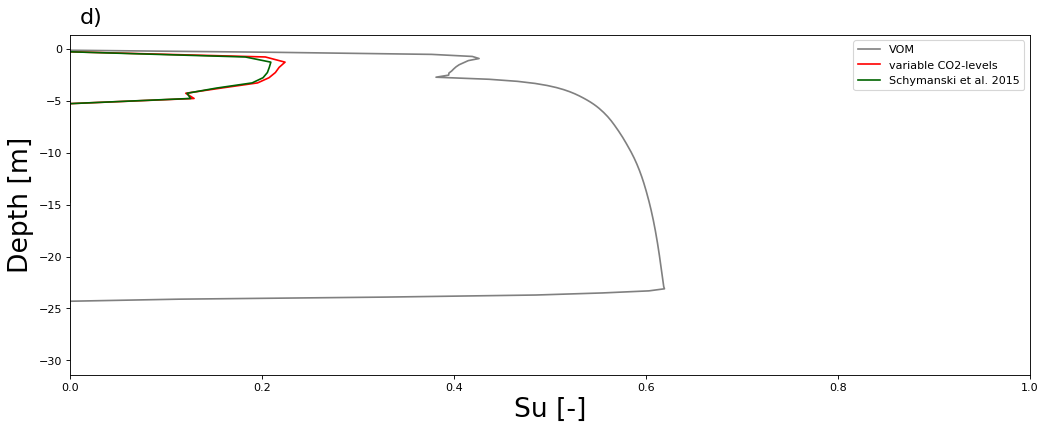

In [48]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/4_co2_var/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "variable CO2-levels" "VOM" --title "a) " --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--palette Set1

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/4_co2_var/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "variable CO2-levels" "VOM" --title "b) " --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt \
--palette Set1

#groundwater
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/additional_analyses/comp2015/4_co2_var/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt\
--depth True -ys 2003 -ye 2005  --ylim -15 0\
--ylabel "Water table [m]"  \
--labels VOM \
--colors "red"\
--i_cz 15 \
--i_zr 10 \
--i_cz2015 15 \
--i_zr2015 10 \
--obs ../../data/boreholes/RN030982.csv \
../../data/boreholes/RN030983.csv \
../../data/boreholes/RN030984.csv \
--pars ../../work/additional_analyses/comp2015/4_co2_var/best/input/pars.txt \
--labels "variable CO2-levels" "VOM"  --title "c)" --legend True

#soil moisture profile
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/4_co2_var/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
-d 0.20 0.50 0.50 \
-cz 30 15 15 -nd 3650 --ylabel "Depth [m]" --xlabel "Su [-]" --cbar_min 0.10 --cbar_max 1.00 \
--cblabel "Layer thickness [m]" --plot_cbar 0 --xlim 0 1 \
--label "VOM" "variable CO2-levels" "Schymanski et al. 2015" --title "d)" \
--colors "gray" "red" "darkgreen"

**Figure S1.4**. Comparison for Howard Springs between the result of Schymanski et al. (2015), where atmospheric CO$_2$-values were fixed at 317ppm (green) and new runs that use the MaunaLoa-records as input with variable CO$_2$-levels (brown), for a) assimilation, b) evaporation, c) grounwater tables and c) the average soil moisture profile. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 
The assimilation is generally higher, similar as for the evaporation. The values for atmospheric CO$_2$-levels are generally higher, leading therefore also to higher values of assimilation. The groundwater tables and soil moisture profiles show similar patterns compared to Schymanski et al. (2015).

## Change of soil layer thickness
The soil layer thickness was reduced from 0.5m to 0.2m for the new model runs.


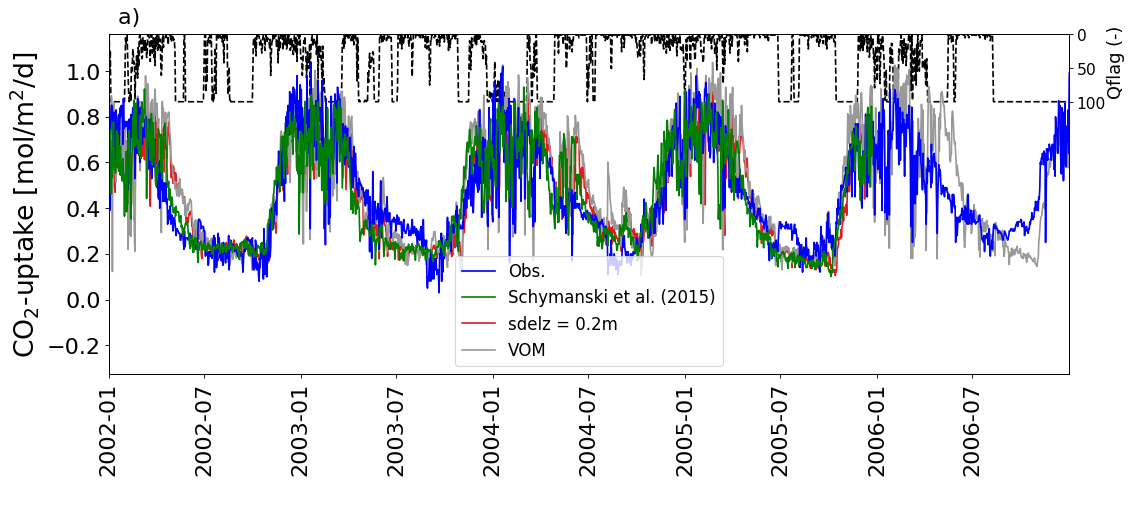

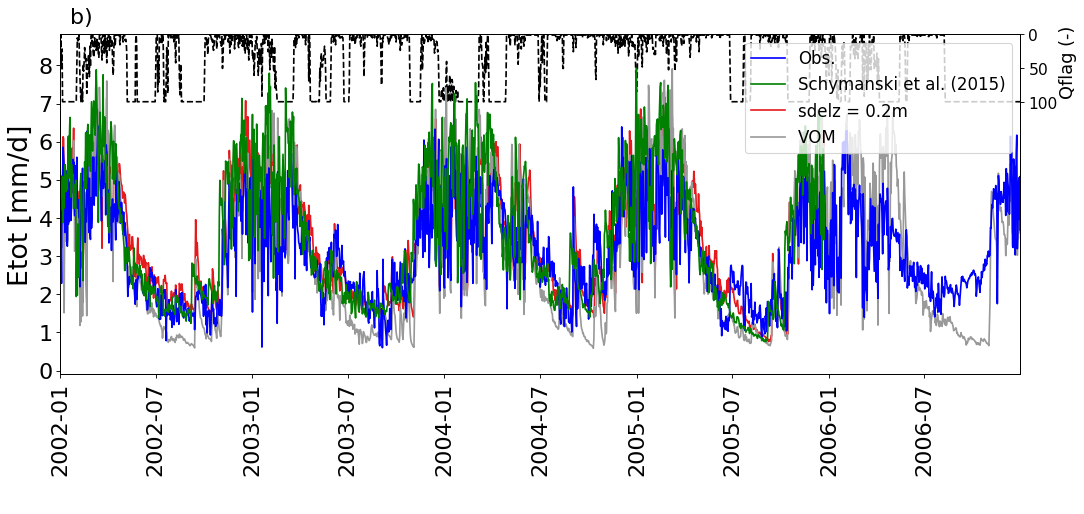

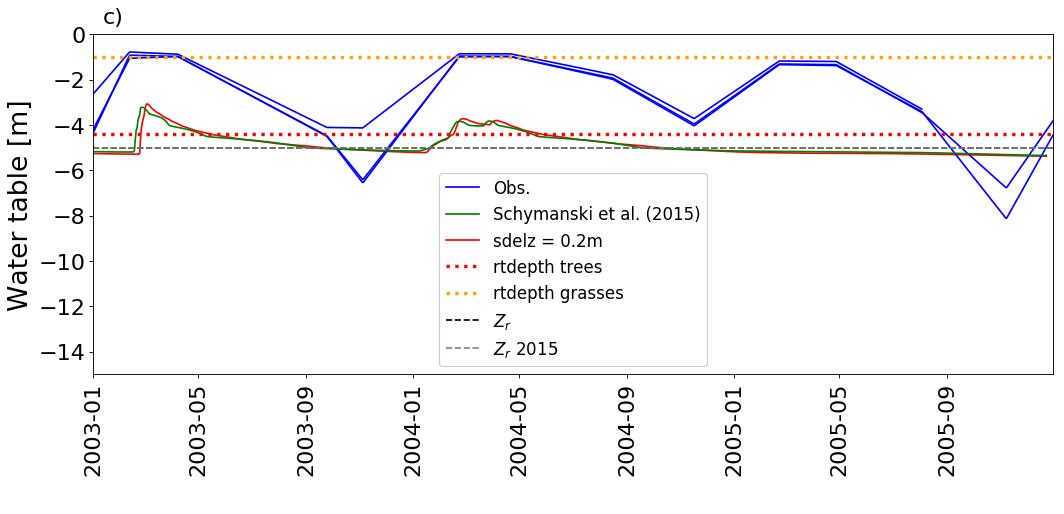

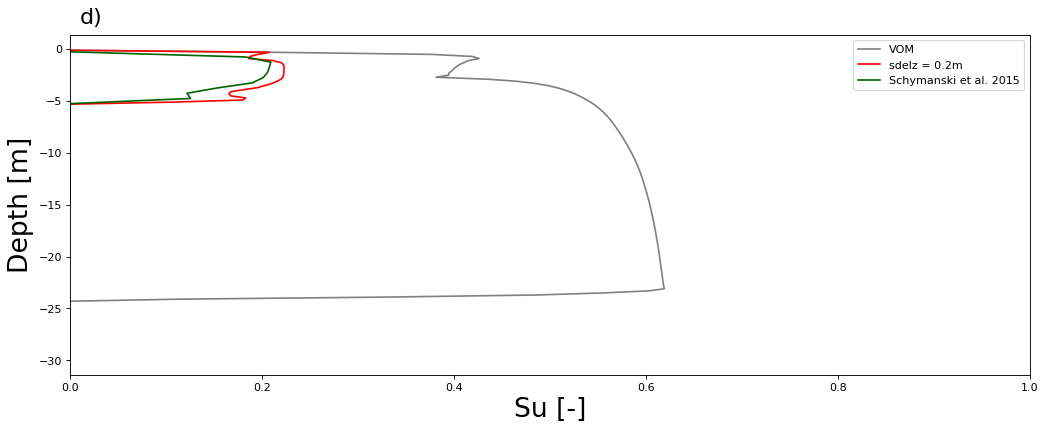

In [49]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/5_sdelz/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "sdelz = 0.2m" "VOM"  --title "a) " --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--palette Set1

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/5_sdelz/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "sdelz = 0.2m" "VOM"  --title "b) " --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt \
--palette Set1

#groundwater
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/additional_analyses/comp2015/5_sdelz/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt\
--depth True -ys 2003 -ye 2005  --ylim -15 0\
--ylabel "Water table [m]"  \
--labels VOM \
--colors "red"\
--i_cz 15 \
--i_zr 10 \
--i_cz2015 15 \
--i_zr2015 10 \
--obs ../../data/boreholes/RN030982.csv \
../../data/boreholes/RN030983.csv \
../../data/boreholes/RN030984.csv \
--pars ../../work/additional_analyses/comp2015/5_sdelz/best/input/pars.txt \
--labels "sdelz = 0.2m" "VOM"  --title "c)" --legend True

#soil moisture profile
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/5_sdelz/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
-d 0.20 0.20 0.50 \
-cz 30 15 15 -nd 3650 --ylabel "Depth [m]" --xlabel "Su [-]" --cbar_min 0.10 --cbar_max 1.00 \
--cblabel "Layer thickness [m]" --plot_cbar 0 --xlim 0 1 \
--label "VOM" "sdelz = 0.2m" "Schymanski et al. 2015" --title "d)" \
--colors "gray" "red" "darkgreen"

**Figure S1.5**. Comparison for Howard Springs between the result of Schymanski et al. (2015), where soil layer thickness was set at 0.5m (green) and new runs that use use a soil layer thickness of 0.2m (red), for a) assimilation, b) evaporation, c) grounwater tables and d) the average soil moisture profile. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 
The results for evaporation, assimilation and groundwater tables have differences, but the differences are generally small and similar as differences occuring after re-running the SCE-optimization (Figure S1.2). The soil moisture values are generally higher now. 


## Change of atmosperic pressures
The atmosperic pressure was fixed by Schymanski et al. (2015) at 1013.25 hPa, the new runs use variable levels obtained from the SILO meteorological data. 


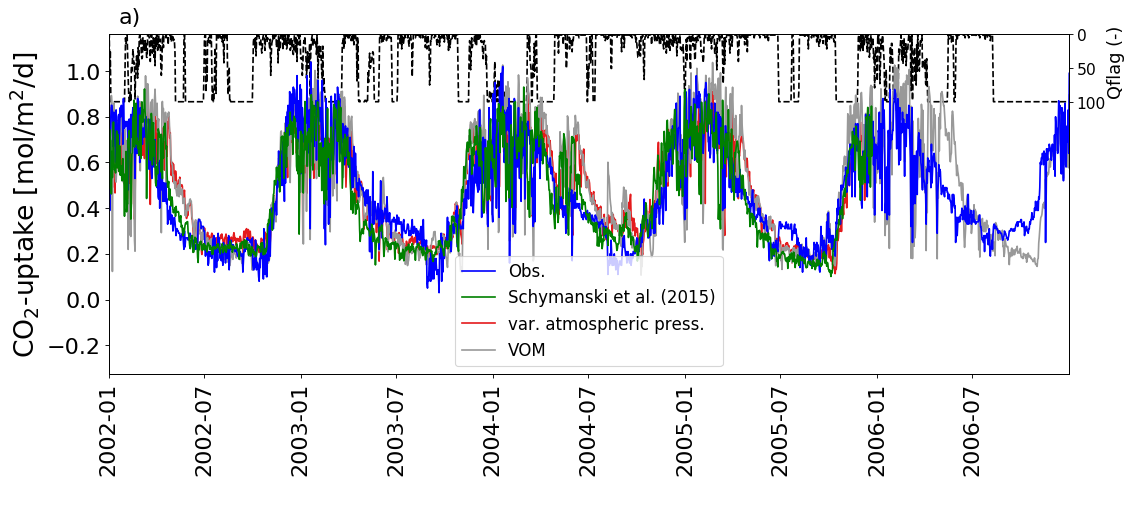

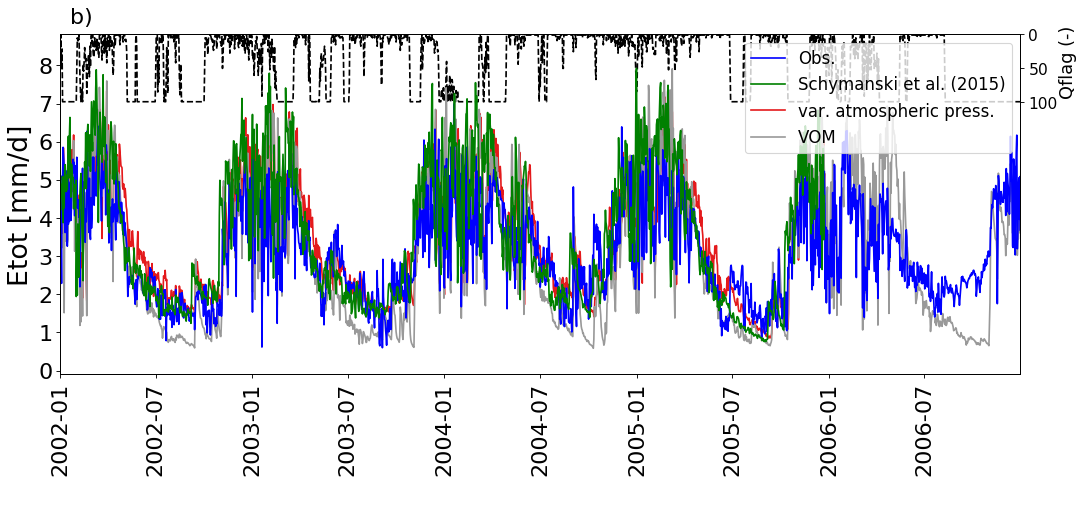

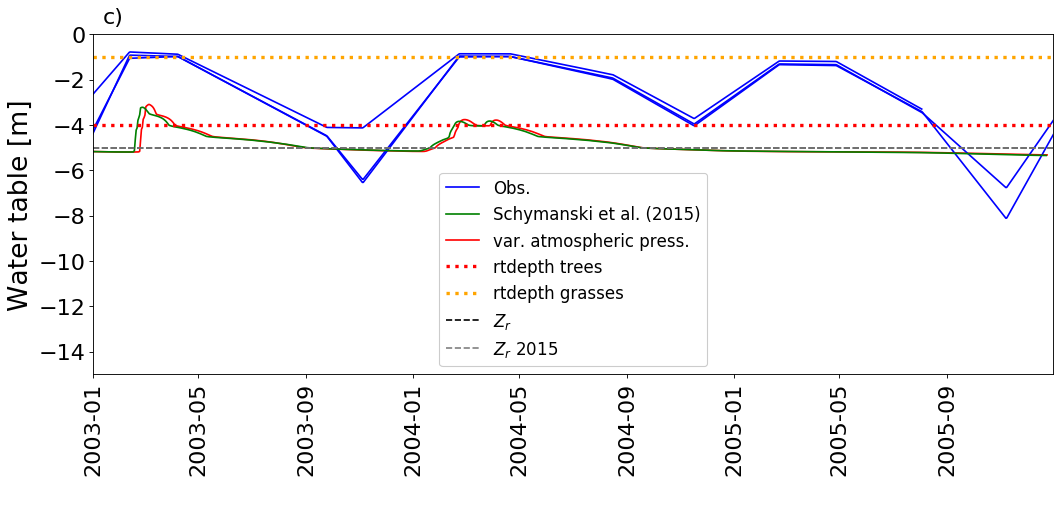

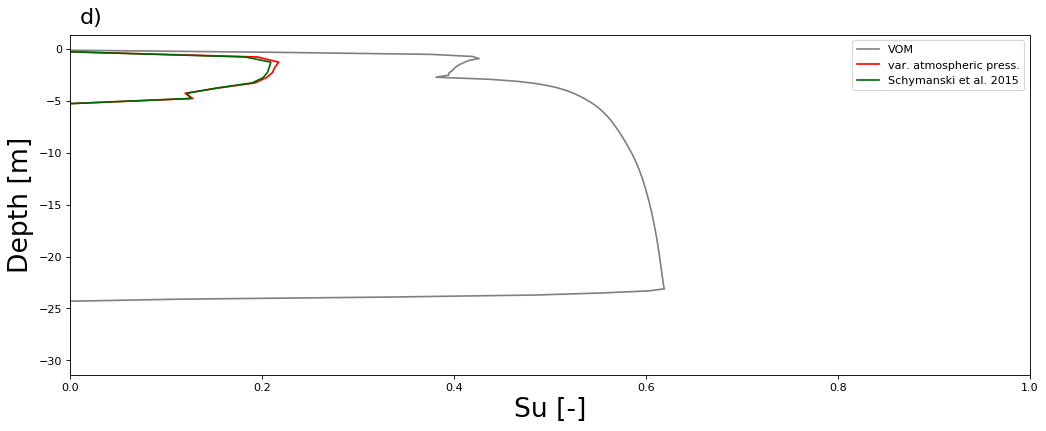

In [52]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/6_atm/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "var. atmospheric press." "VOM" --title "a)" --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--palette Set1

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/6_atm/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "var. atmospheric press." "VOM" --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt \
--palette Set1

#groundwater
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/additional_analyses/comp2015/6_atm/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt\
--depth True -ys 2003 -ye 2005  --ylim -15 0\
--ylabel "Water table [m]"  \
--labels VOM \
--colors "red"\
--i_cz 15 \
--i_zr 10 \
--i_cz2015 15 \
--i_zr2015 10 \
--obs ../../data/boreholes/RN030982.csv \
../../data/boreholes/RN030983.csv \
../../data/boreholes/RN030984.csv \
--pars ../../work/additional_analyses/comp2015/6_atm/best/input/pars.txt \
--labels "var. atmospheric press." "VOM"  --title "c)" --legend True

#soil moisture profile
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/6_atm/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
-d 0.20 0.50 0.50 \
-cz 30 15 15 -nd 3650 --ylabel "Depth [m]" --xlabel "Su [-]" --cbar_min 0.10 --cbar_max 1.00 \
--cblabel "Layer thickness [m]" --plot_cbar 0 --xlim 0 1 \
--label "VOM" "var. atmospheric press." "Schymanski et al. 2015" --title "d)" \
--colors "gray" "red" "darkgreen"

**Figure S1.6**. Comparison for Howard Springs between the result of Schymanski et al. (2015), where atmosperic pressure was fixed at 1013.25 hPa (green) and new runs that use variable levels obtained from the SILO meteorological data (red), for a) assimilation, b) evaporation, c) groundwater tables and d) the average soil moisture profile. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 
The results for evaporation and assimilation have differences, but the differences are generally small and similar as differences occuring after re-running the SCE-optimization (Figure S1.2).

## Optimizing rooting depths grasses
The grass rooting depths were fixed at 1.0m by Schymanski et al. (2015), the new runs optimize the rooting depth of grasses as well. 

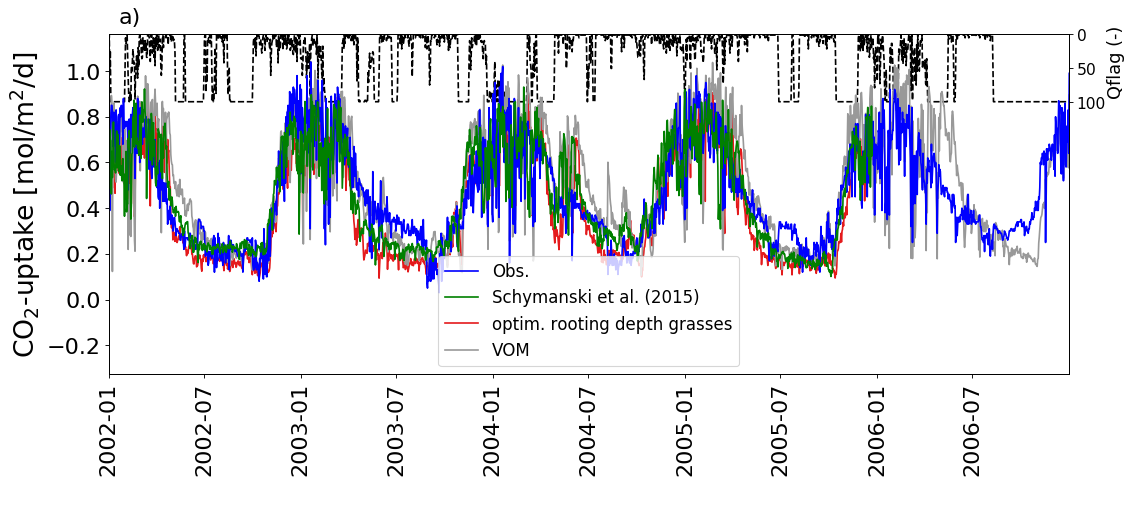

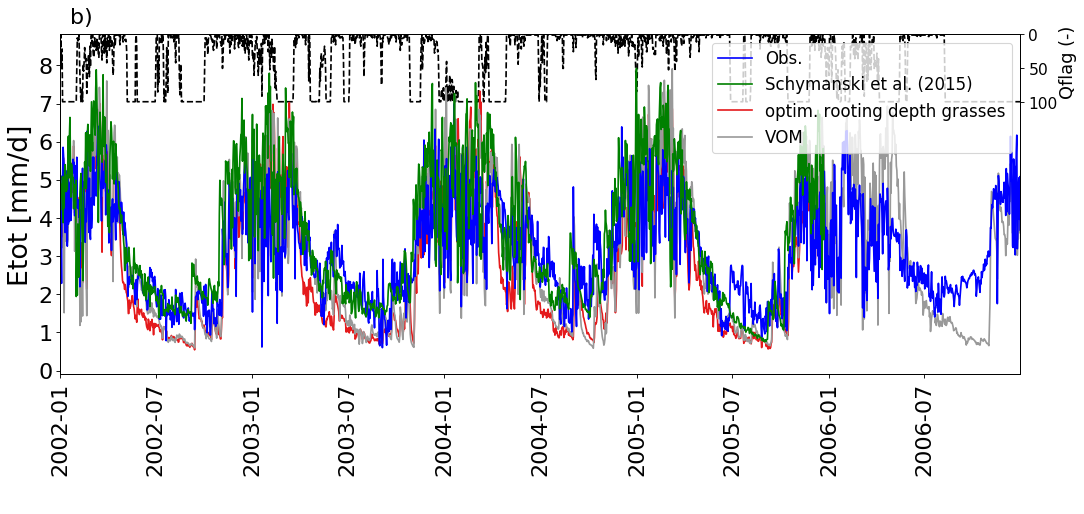

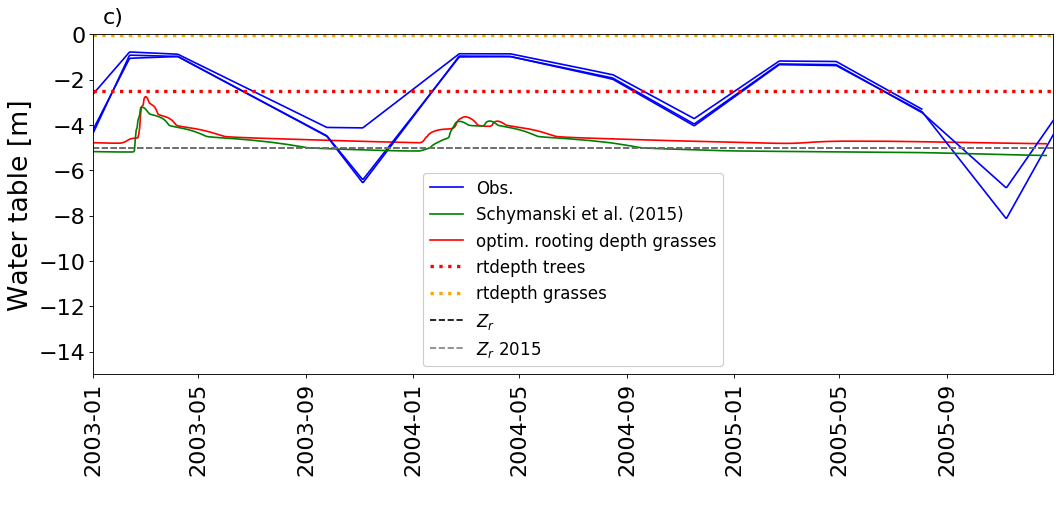

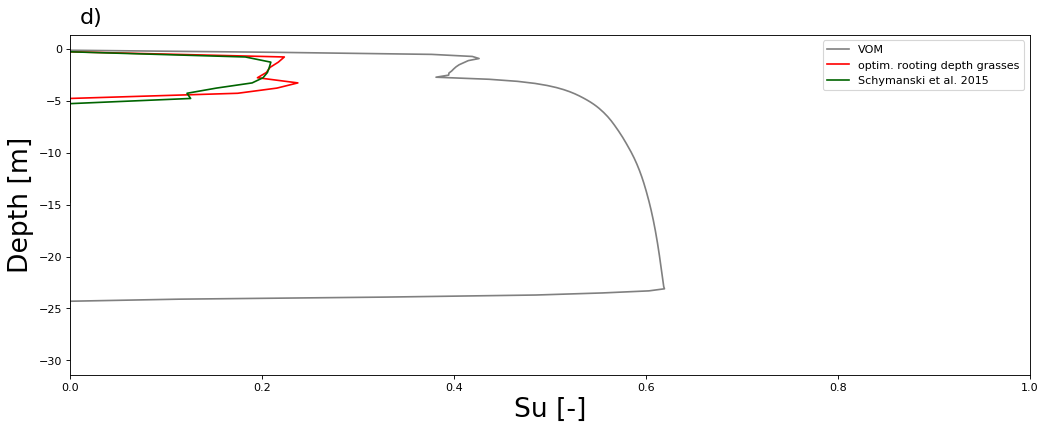

In [54]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/7_rgdepth/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "optim. rooting depth grasses" "VOM" --title "a)" --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--palette Set1

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/7_rgdepth/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "optim. rooting depth grasses" "VOM" --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt \
--palette Set1

#groundwater
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/additional_analyses/comp2015/7_rgdepth/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt\
--depth True -ys 2003 -ye 2005  --ylim -15 0\
--ylabel "Water table [m]"  \
--labels VOM \
--colors "red"\
--i_cz 15 \
--i_zr 10 \
--i_cz2015 15 \
--i_zr2015 10 \
--obs ../../data/boreholes/RN030982.csv \
../../data/boreholes/RN030983.csv \
../../data/boreholes/RN030984.csv \
--pars ../../work/additional_analyses/comp2015/7_rgdepth/best/input/pars.txt \
--labels "optim. rooting depth grasses" "VOM"  --title "c)" --legend True

#soil moisture profile
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/7_rgdepth/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
-d 0.20 0.50 0.50 \
-cz 30 15 15 -nd 3650 --ylabel "Depth [m]" --xlabel "Su [-]" --cbar_min 0.10 --cbar_max 1.00 \
--cblabel "Layer thickness [m]" --plot_cbar 0 --xlim 0 1 \
--label "VOM" "optim. rooting depth grasses" "Schymanski et al. 2015" --title "d)" \
--colors "gray" "red" "darkgreen"

**Figure S1.7**. Comparison for Howard Springs between the result of Schymanski et al. (2015), where grass rooting depths were fixed at 1.0m (green) and new runs that optimize the rooting depth of grasses (red), for a) assimilation, b) evaporation, c) groundwater tables and d) the average soil moisture profile. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 
The fluxes show a stronger decrease when grass rooting depths are optimized, especially for evaporation. The soil moisture profiles also show differences, but remain rather similar. The resulting rooting depths are also different, originally results of Schymanski et al. (2015) converged to 4.2m for trees and used a fixed grass rooting depth of 1m, optimizing for grass rooting depths leads to 2.5m and 0.52m for the trees and grasses respectively. The final new runs optimized towards values of 2.6m and 0.40m for the trees and grasses respectively.


## Costfactor for water transport capacity

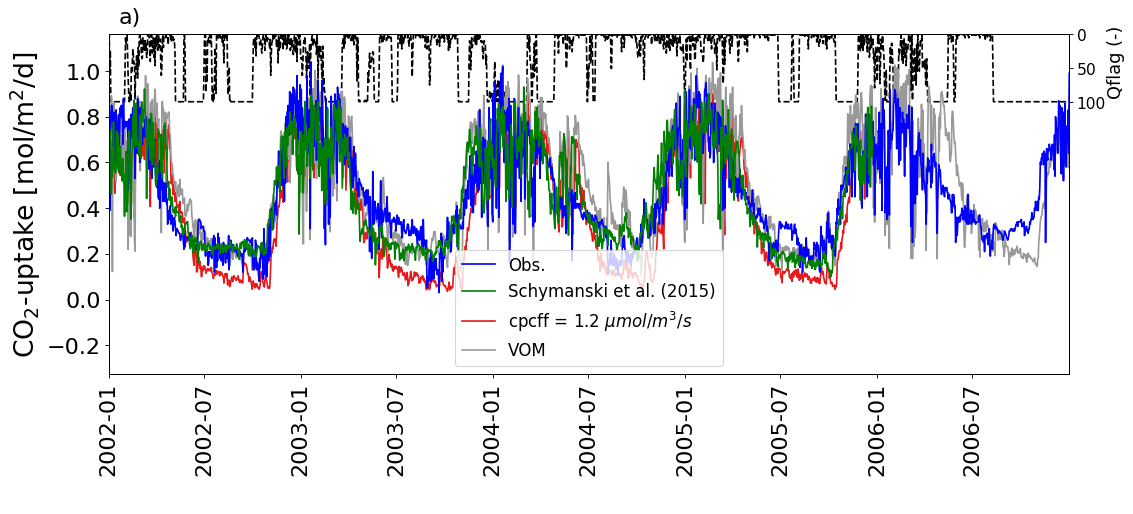

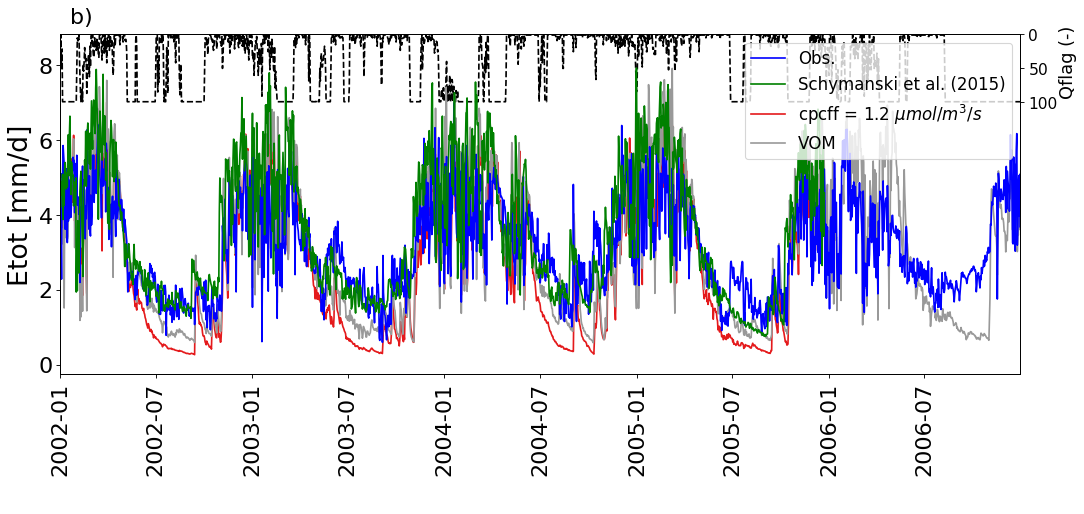

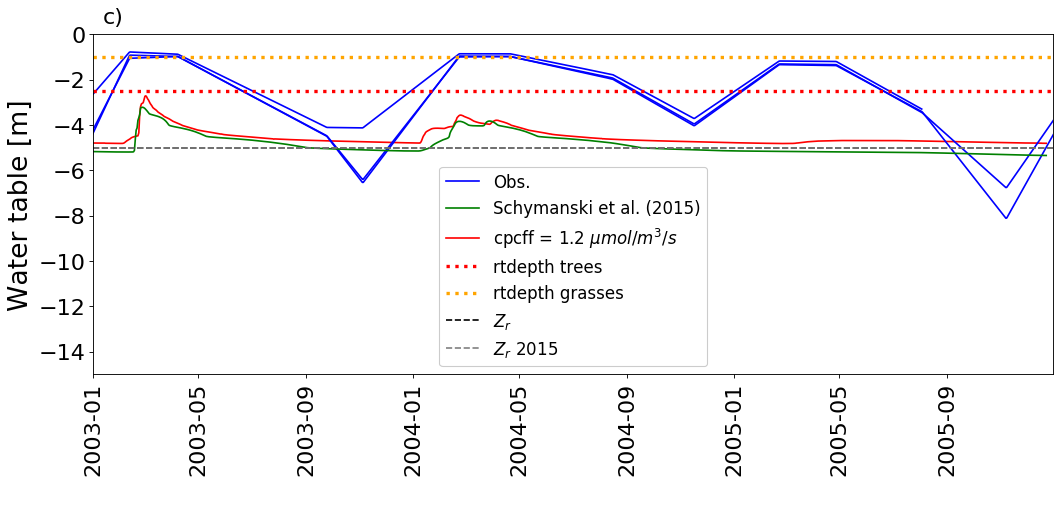

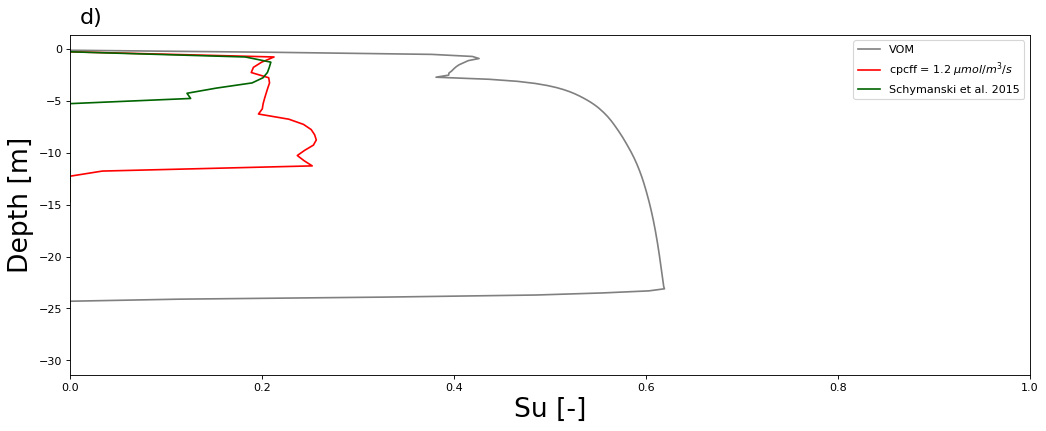

In [56]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/8_cpcff/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "cpcff = 1.2 $\mu mol/m^3/s$" "VOM"  --title "a)" --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt\
--palette Set1

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/8_cpcff/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "cpcff = 1.2 $\mu mol/m^3/s$" "VOM" --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt\
--palette Set1

#groundwater
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/additional_analyses/comp2015/8_cpcff/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt\
--depth True -ys 2003 -ye 2005  --ylim -15 0\
--ylabel "Water table [m]"  \
--labels VOM \
--colors "red"\
--i_cz 15 \
--i_zr 10 \
--i_cz2015 15 \
--i_zr2015 10 \
--obs ../../data/boreholes/RN030982.csv \
../../data/boreholes/RN030983.csv \
../../data/boreholes/RN030984.csv \
--pars ../../work/additional_analyses/comp2015/8_cpcff/best/input/pars.txt \
--labels "cpcff = 1.2 $\mu mol/m^3/s$" "VOM"  --title "c)" --legend True

#soil moisture profile
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/8_cpcff/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
-d 0.20 0.50 0.50 \
-cz 30 15 15 -nd 3650 --ylabel "Depth [m]" --xlabel "Su [-]" --cbar_min 0.10 --cbar_max 1.00 \
--cblabel "Layer thickness [m]" --plot_cbar 0 --xlim 0 1 \
--label "VOM" "cpcff = 1.2 $\mu mol/m^3/s$" "Schymanski et al. 2015" --title "d)" \
--colors "gray" "red" "darkgreen"

**Figure S1.8**. Comparison for Howard Springs between the result of Schymanski et al. (2015), where the costfactor for water transport capacity was set at 1.0 $\mu mol/m3/s$ (green) and runs that use is set to 1.2 $\mu mol/m3/s$ (red), for a) assimilation, b) evaporation, c) groundwater tables and d) soil moisture profiles. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 
There is a strong difference in the two model runs with different values for the costfactor for water transport. Especially during the wet period the values for assimilation and evaporation are much lower for a higher costfactor. The groundwater tables remain rather similar, but the soil moisture profile shows strong differences.

## Weatherdata
The meteorological forcing data was updated by a newer version from the Australian SILO. This included variable atmosperic pressure levels.

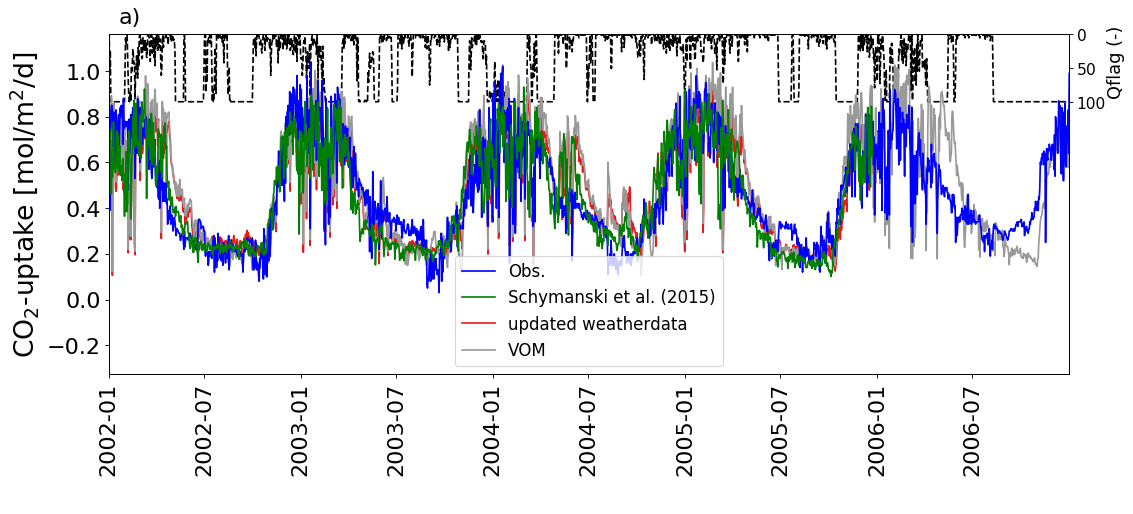

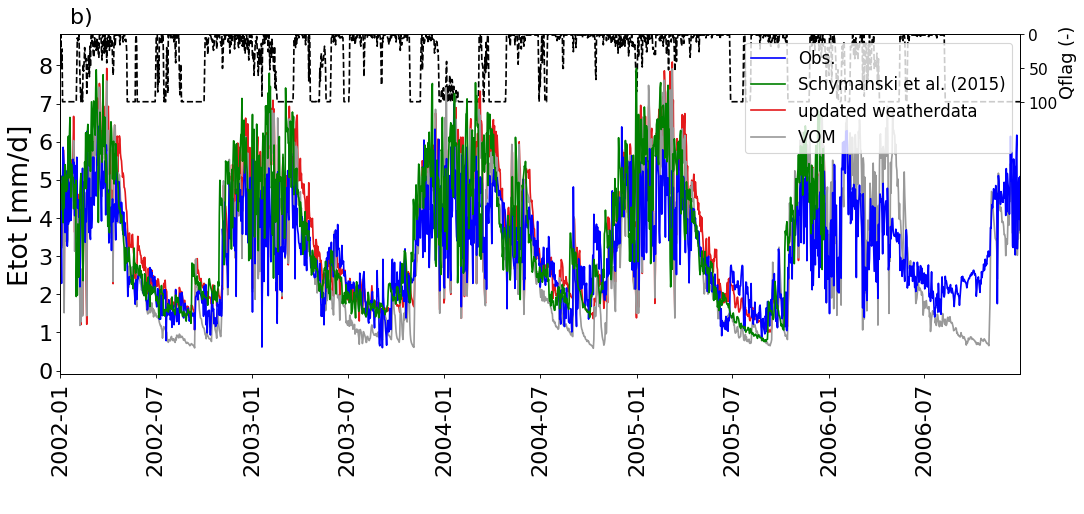

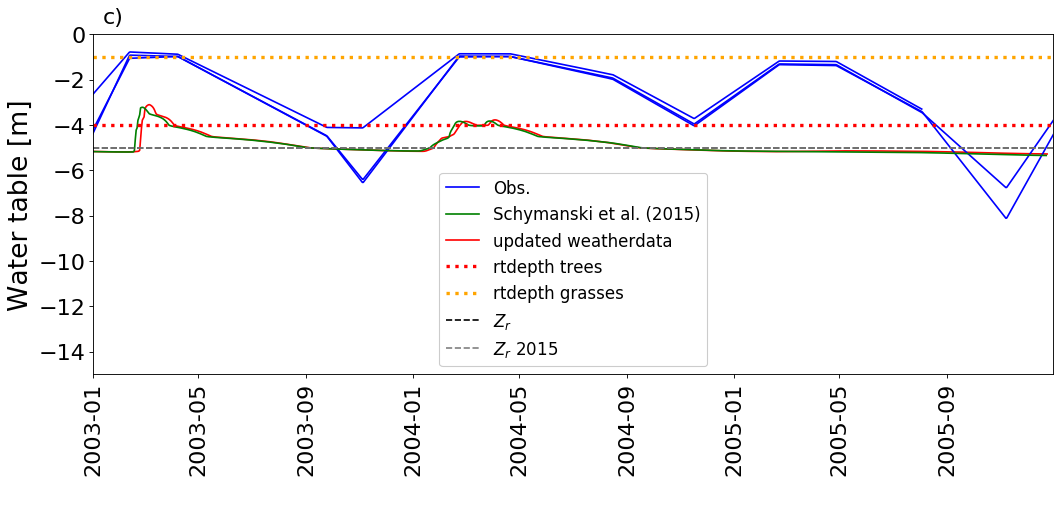

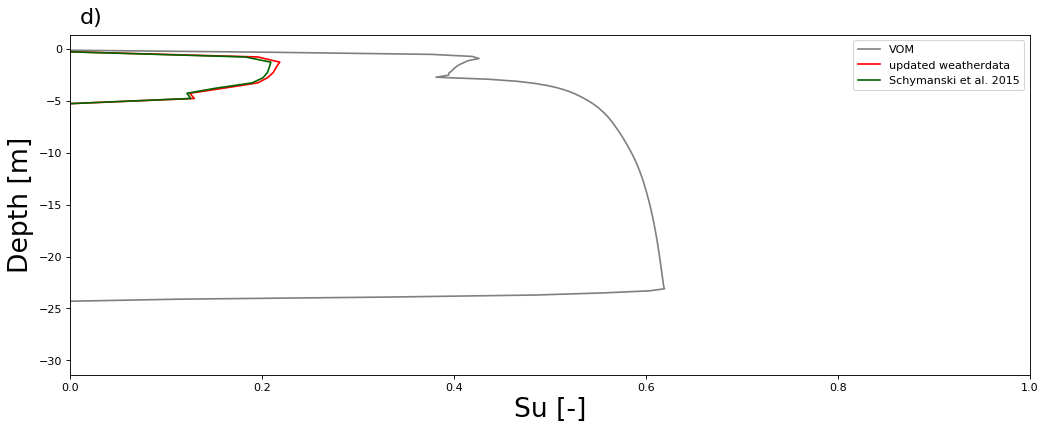

In [58]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/9_weather/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "updated weatherdata" "VOM" --title "a)" --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--palette Set1

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/9_weather/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "updated weatherdata" "VOM" --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt \
--palette Set1

#groundwater
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/additional_analyses/comp2015/9_weather/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt\
--depth True -ys 2003 -ye 2005  --ylim -15 0\
--ylabel "Water table [m]"  \
--labels VOM \
--colors "red"\
--i_cz 15 \
--i_zr 10 \
--i_cz2015 15 \
--i_zr2015 10 \
--obs ../../data/boreholes/RN030982.csv \
../../data/boreholes/RN030983.csv \
../../data/boreholes/RN030984.csv \
--pars ../../work/additional_analyses/comp2015/9_weather/best/input/pars.txt \
--labels "updated weatherdata" "VOM"  --title "c)" --legend True

#soil moisture profile
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/9_weather/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
-d 0.20 0.50 0.50 \
-cz 30 15 15 -nd 3650 --ylabel "Depth [m]" --xlabel "Su [-]" --cbar_min 0.10 --cbar_max 1.00 \
--cblabel "Layer thickness [m]" --plot_cbar 0 --xlim 0 1 \
--label "VOM" "updated weatherdata" "Schymanski et al. 2015" --title "d)" \
--colors "gray" "red" "darkgreen"

**Figure S1.9**. Comparison for Howard Springs between the result of Schymanski et al. (2015) (green) and new runs that use a new version of SILO-datadrill, including variable atmosperic levels (red), for a) assimilation, b) evaporation, c) groundwater tables and d) the average soil moisture profile. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 
The model runs only show minor differences, similar to differences obtained by re-running the SCE-optimization (Figure S1.2).

## New hydrology

The soil parameters are the same as for Schymanski et al (2015) as sandy loam, but the hydrological parameters were changed in order to have freely draining conditions.

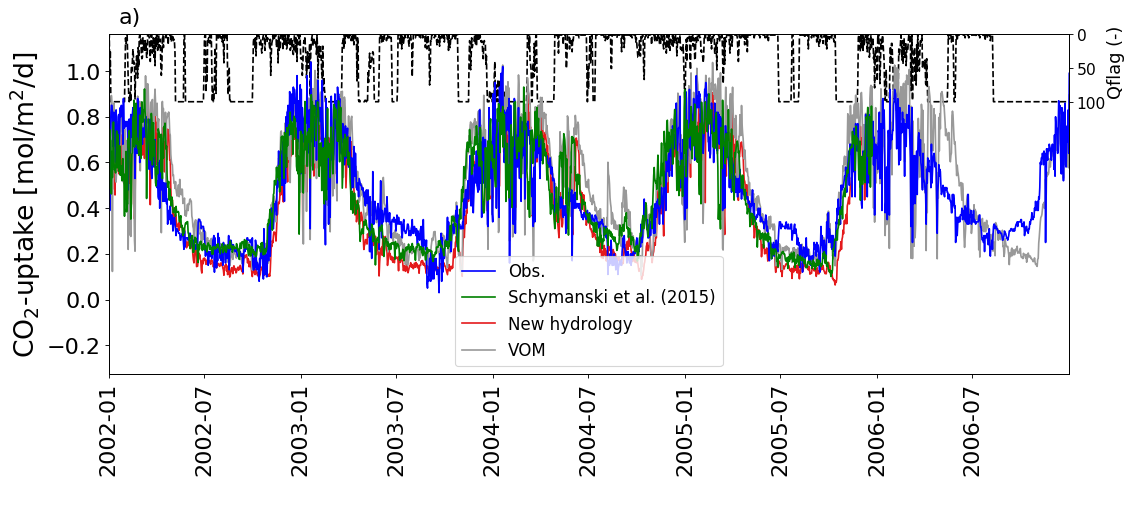

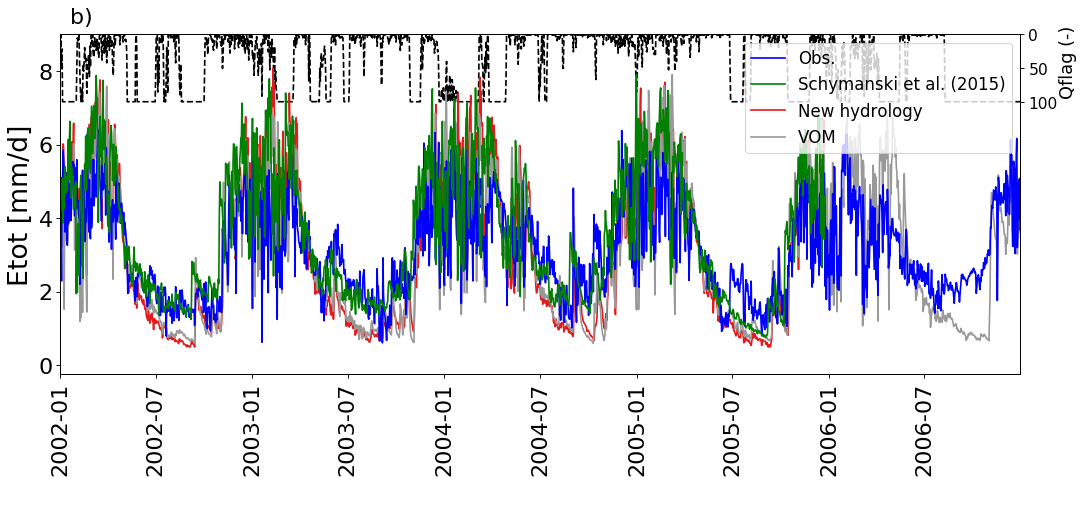

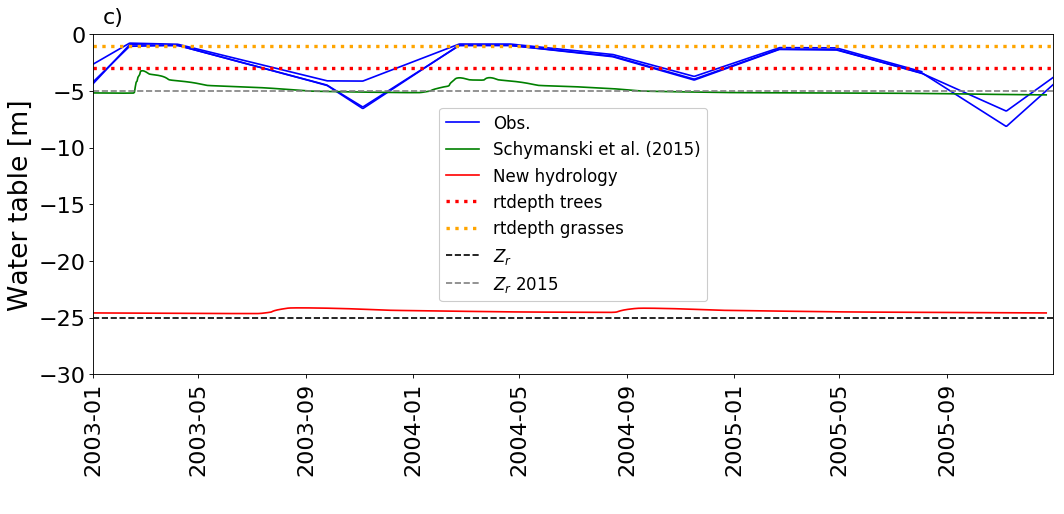

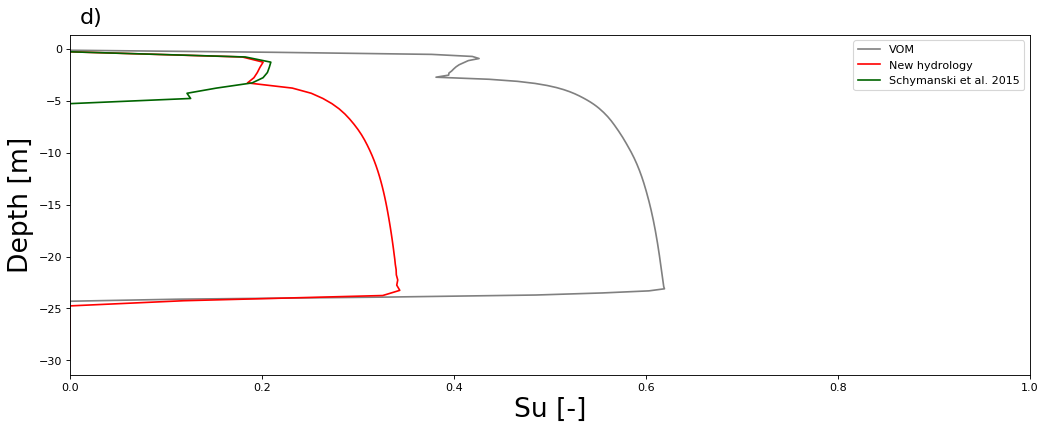

In [62]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/10_hydro/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "New hydrology" "VOM" --title "a)" --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--palette Set1

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/10_hydro/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "New hydrology" "VOM" --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt \
--palette Set1

#groundwater
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/additional_analyses/comp2015/10_hydro/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt\
--depth True -ys 2003 -ye 2005  --ylim -30 0\
--ylabel "Water table [m]"  \
--labels VOM \
--colors "red"\
--i_cz 30 \
--i_zr 5 \
--i_cz2015 15 \
--i_zr2015 10 \
--obs ../../data/boreholes/RN030982.csv \
../../data/boreholes/RN030983.csv \
../../data/boreholes/RN030984.csv \
--pars ../../work/additional_analyses/comp2015/10_hydro/best/input/pars.txt \
--labels "New hydrology" "VOM"  --title "c)" --legend True

#soil moisture profile
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/10_hydro/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
-d 0.20 0.50 0.50 \
-cz 30 30 15 -nd 3650 --ylabel "Depth [m]" --xlabel "Su [-]" --cbar_min 0.10 --cbar_max 1.00 \
--cblabel "Layer thickness [m]" --plot_cbar 0 --xlim 0 1 \
--label "VOM" "New hydrology" "Schymanski et al. 2015" --title "d)" \
--colors "gray" "red" "darkgreen"




**Figure S1.10**. Comparison for Howard Springs between the result of Schymanski et al. (2015) (green) and new runs that use free draining hydrological parameters (red), for a) assimilation b) evaporation, c) groundwater tables and d) the average soil moisture profile. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. Differences occur for assimilation, but the differences are even bigger for the evaporation, especially during the dry season. The soil moisture profiles are similar in the upper layers, but increase strongly for the deeper layers. 

## New soil parameters

The soil column was now parameterized as sandy clay loam, with especially a lower saturated hydraulic conductivity.

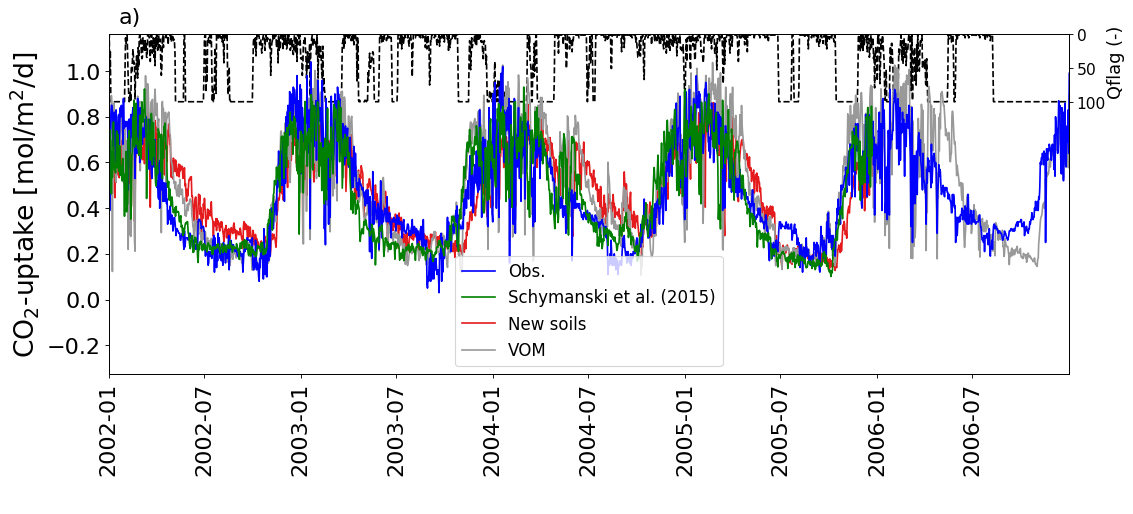

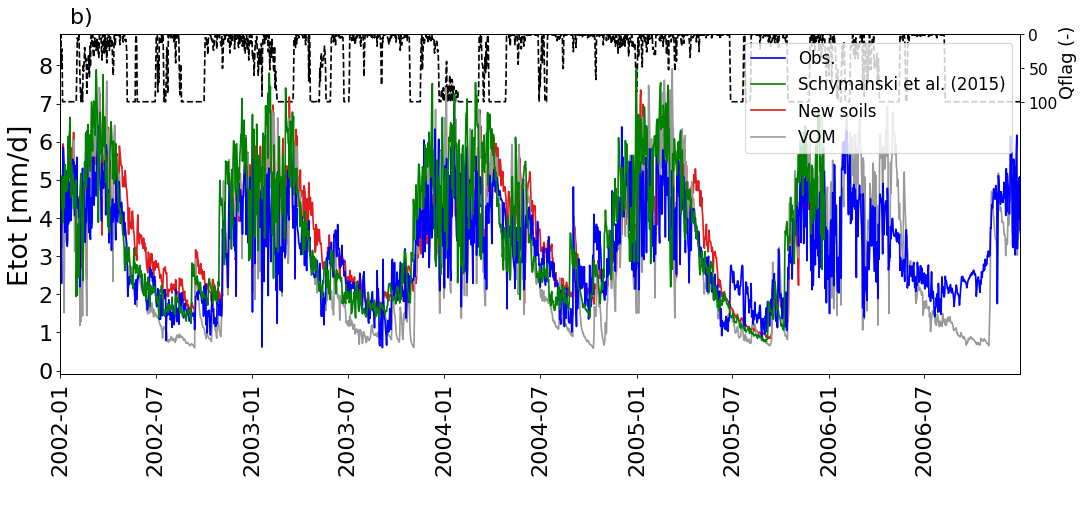

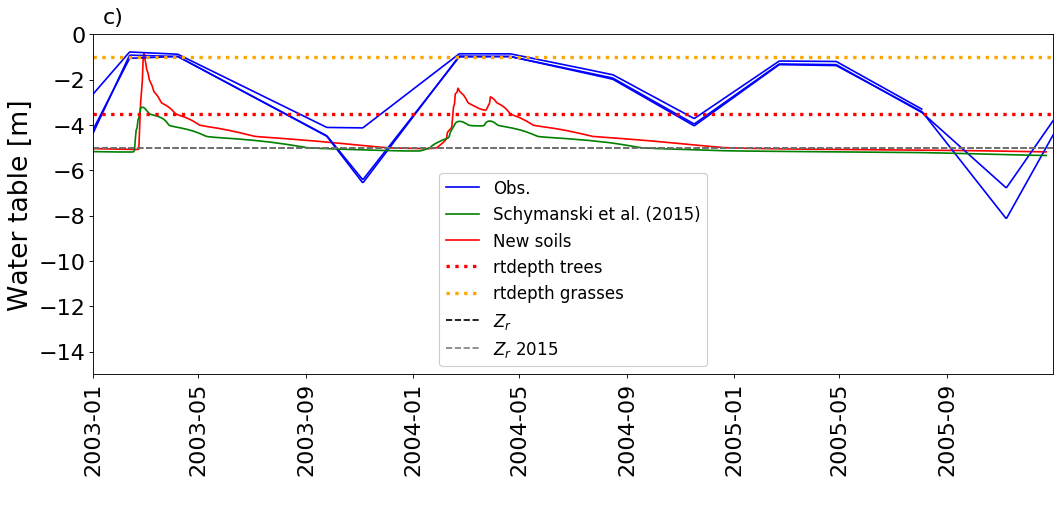

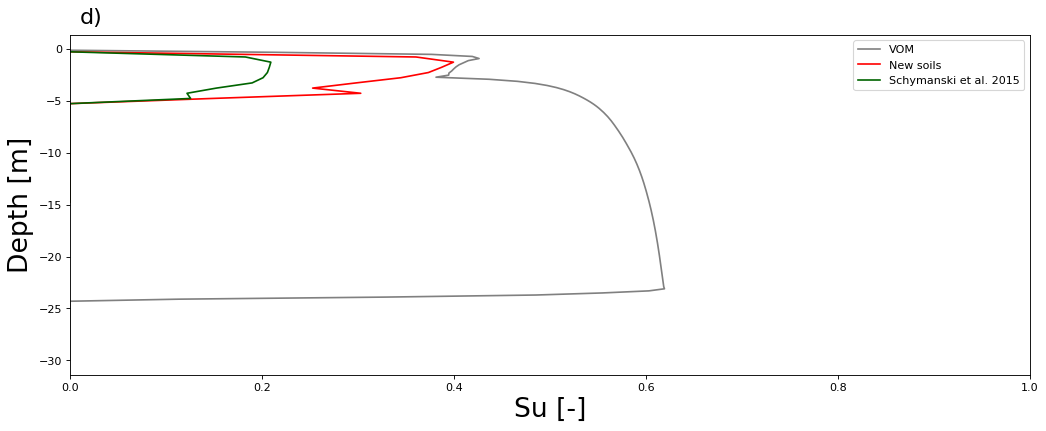

In [76]:
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/11_soil/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "New soils" "VOM" --title "a)" --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--palette Set1

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/11_soil/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "New soils" "VOM" --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt \
--palette Set1

#groundwater
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/additional_analyses/comp2015/11_soil/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt\
--depth True -ys 2003 -ye 2005  --ylim -15 0\
--ylabel "Water table [m]"  \
--labels VOM \
--colors "red"\
--i_cz 15 \
--i_zr 10 \
--i_cz2015 15 \
--i_zr2015 10 \
--obs ../../data/boreholes/RN030982.csv \
../../data/boreholes/RN030983.csv \
../../data/boreholes/RN030984.csv \
--pars ../../work/additional_analyses/comp2015/11_soil/best/input/pars.txt \
--labels "New soils" "VOM"  --title "c)" --legend True

#soil moisture profile
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/11_soil/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
-d 0.20 0.50 0.50 \
-cz 30 15 15 -nd 3650 --ylabel "Depth [m]" --xlabel "Su [-]" --cbar_min 0.10 --cbar_max 1.00 \
--cblabel "Layer thickness [m]" --plot_cbar 0 --xlim 0 1 \
--label "VOM" "New soils" "Schymanski et al. 2015" --title "d)" \
--colors "gray" "red" "darkgreen"




**Figure S1.11**. Comparison for Howard Springs between the result of Schymanski et al. (2015) (green) and new runs that use different, homogeneous soil parameters (red), for a) assimilation b) evaporation, c) groundwater tables and d) the average soil moisture profile. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 
It can be noted that groundwater tables and soil moisture values both increase, due to reduced drainability.

## New Ksat
Only the saturated hydraulic conductivity was changed to a much smaller value (similar as for sandy clay loam).

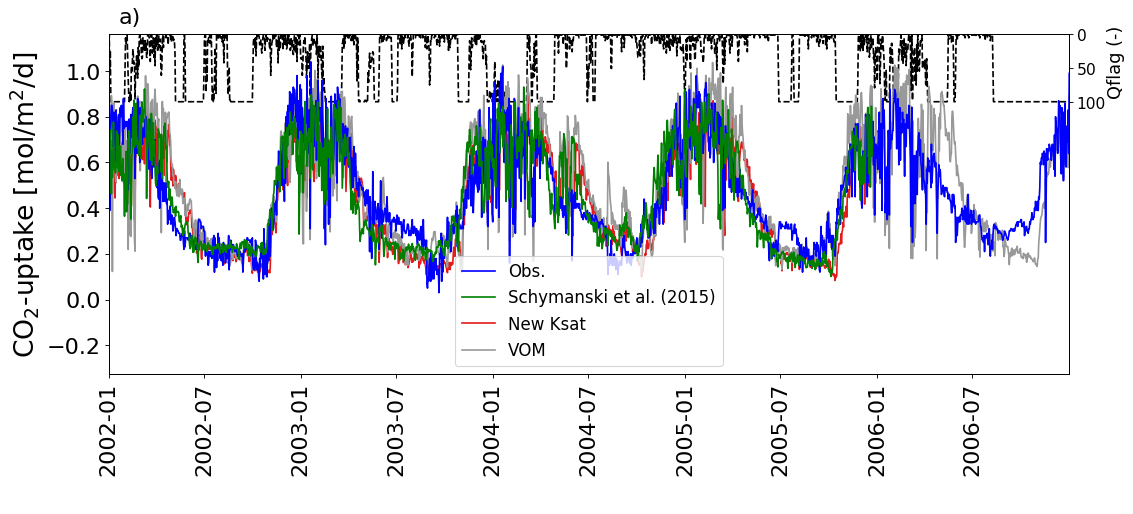

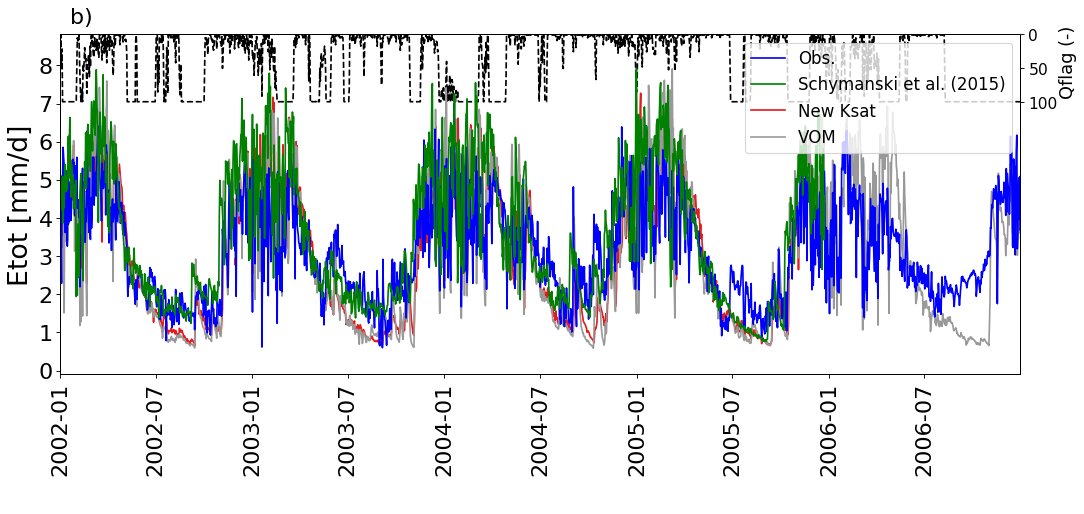

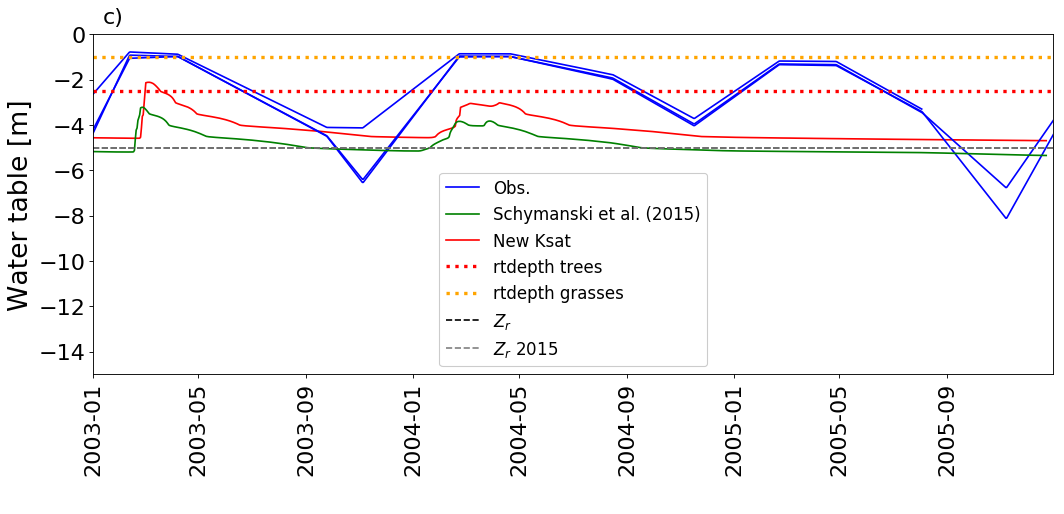

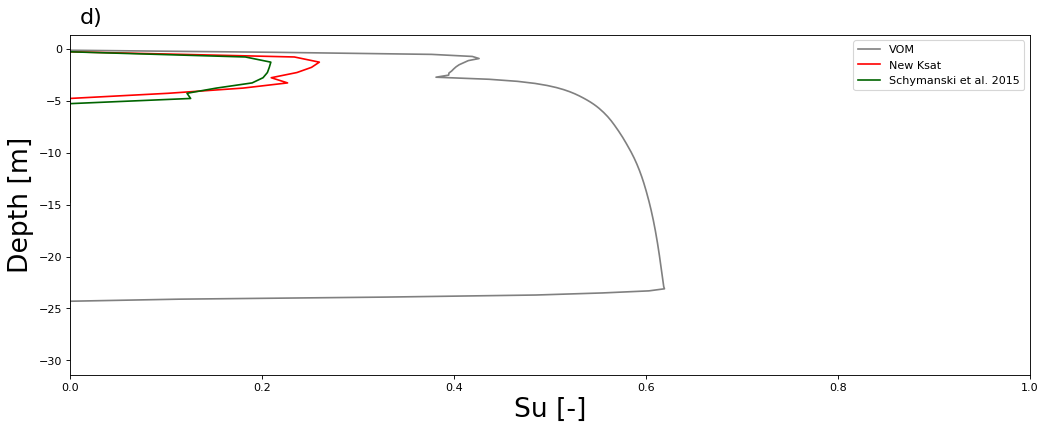

In [78]:
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/12_ksat/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "New Ksat" "VOM" --title "a)" --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--palette Set1

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/12_ksat/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "New Ksat" "VOM" --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt \
--palette Set1

#groundwater
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/additional_analyses/comp2015/12_ksat/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt\
--depth True -ys 2003 -ye 2005  --ylim -15 0\
--ylabel "Water table [m]"  \
--labels VOM \
--colors "red"\
--i_cz 15 \
--i_zr 10 \
--i_cz2015 15 \
--i_zr2015 10 \
--obs ../../data/boreholes/RN030982.csv \
../../data/boreholes/RN030983.csv \
../../data/boreholes/RN030984.csv \
--pars ../../work/additional_analyses/comp2015/12_ksat/best/input/pars.txt \
--labels "New Ksat" "VOM"  --title "c)" --legend True

#soil moisture profile
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/12_ksat/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
-d 0.20 0.50 0.50 \
-cz 30 15 15 -nd 3650 --ylabel "Depth [m]" --xlabel "Su [-]" --cbar_min 0.10 --cbar_max 1.00 \
--cblabel "Layer thickness [m]" --plot_cbar 0 --xlim 0 1 \
--label "VOM" "New Ksat" "Schymanski et al. 2015" --title "d)" \
--colors "gray" "red" "darkgreen"



**Figure S1.12**. Comparison for Howard Springs between the result of Schymanski et al. (2015) (green) and new runs that use the same homogeneous soil parameters except for a decreases saturated hydraulic conductivity (red), for a) assimilation b) evaporation, c) groundwater tables and d) the average soil moisture profile. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 
It can be noted that groundwater tables and soil moisture values both increase, due to reduced drainability.

## New soil profile and hydrology
A soil profile was added and hydrology was set to be freely draining.

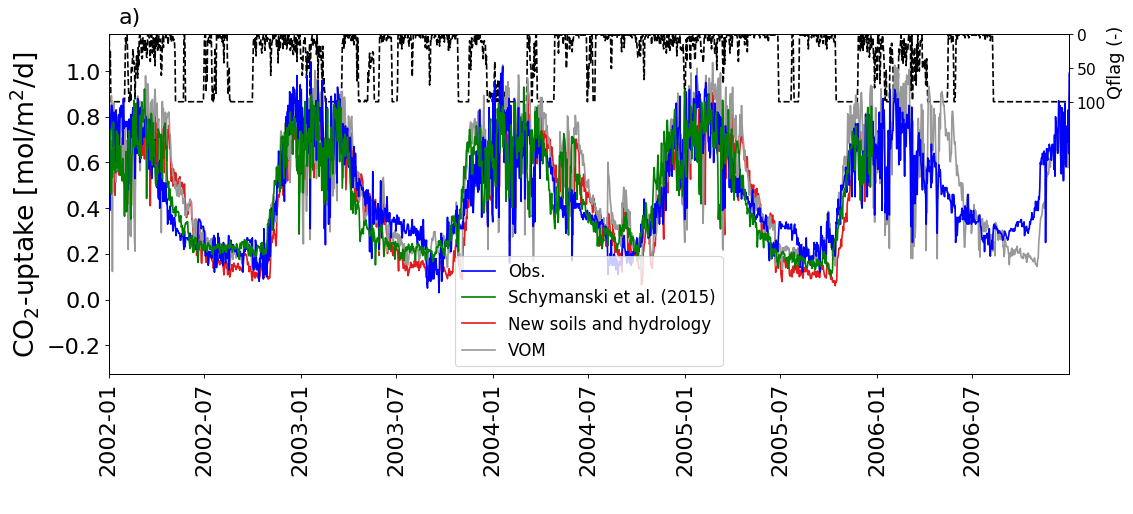

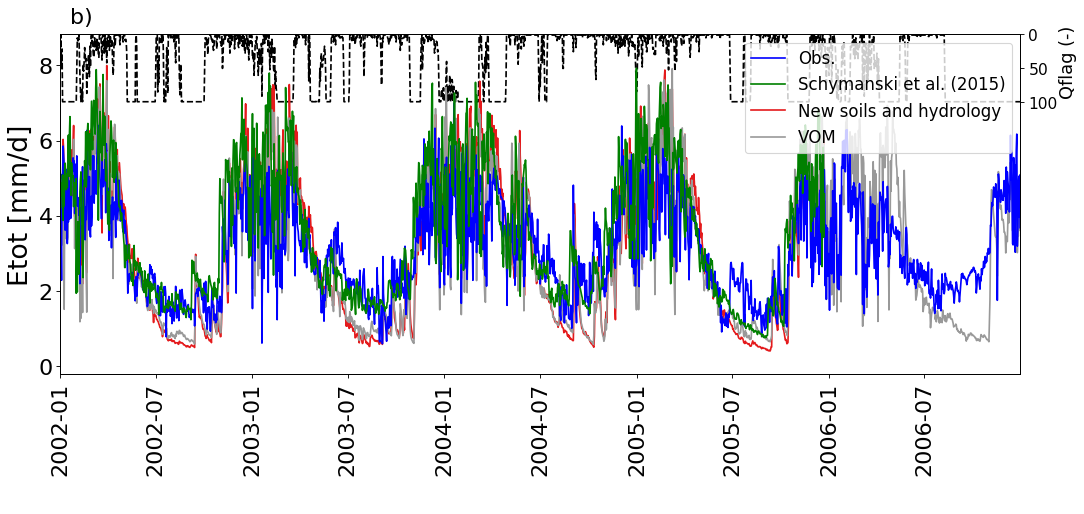

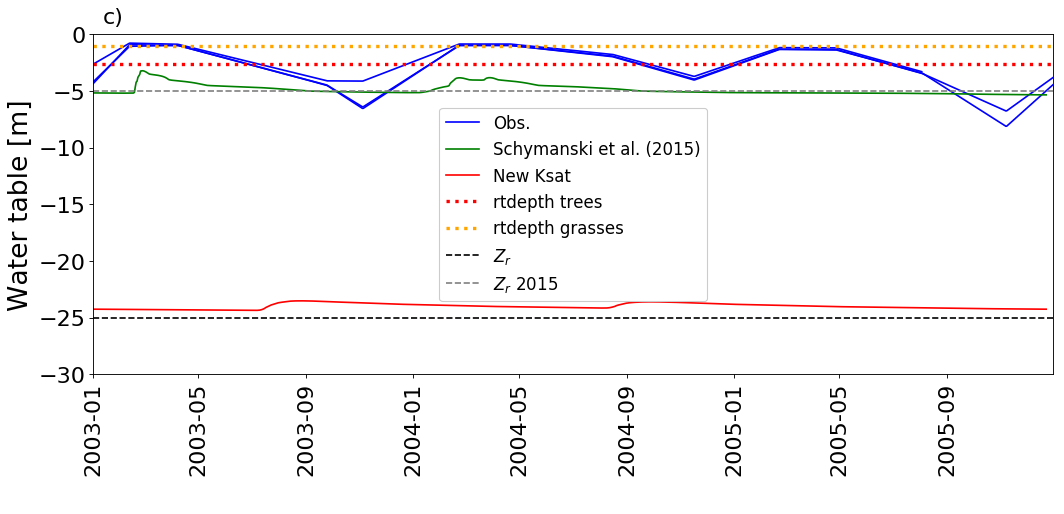

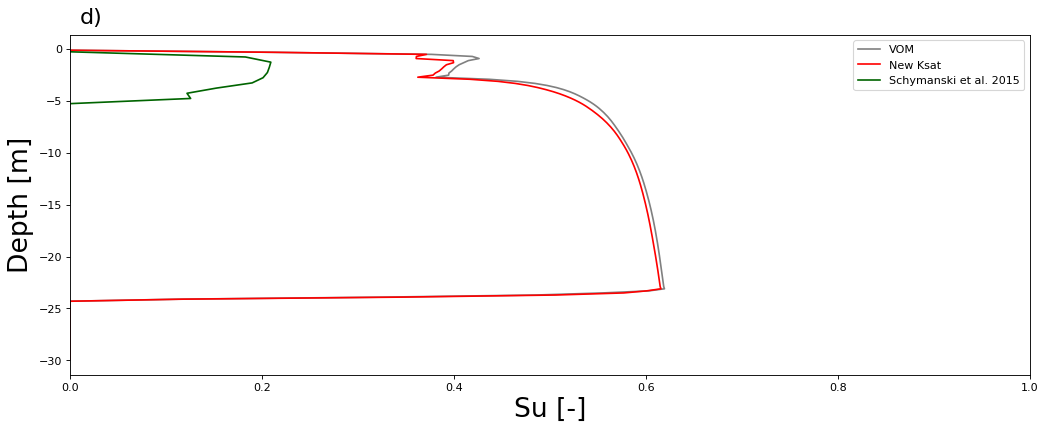

In [81]:
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/13_soilprofile_hydro/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "New soils and hydrology" "VOM" --title "a)" --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt \
--palette Set1

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/13_soilprofile_hydro/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "New soils and hydrology" "VOM" --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt\
--palette Set1

#groundwater
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/additional_analyses/comp2015/13_soilprofile_hydro/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt\
--depth True -ys 2003 -ye 2005  --ylim -30 0\
--ylabel "Water table [m]"  \
--labels VOM \
--colors "red"\
--i_cz 30 \
--i_zr 5 \
--i_cz2015 15 \
--i_zr2015 10 \
--obs ../../data/boreholes/RN030982.csv \
../../data/boreholes/RN030983.csv \
../../data/boreholes/RN030984.csv \
--pars ../../work/additional_analyses/comp2015/13_soilprofile_hydro/best/input/pars.txt \
--labels "New Ksat" "VOM"  --title "c)" --legend True

#soil moisture profile
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/13_soilprofile_hydro/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
-d 0.20 0.20 0.50 \
-cz 30 30 15 -nd 3650 --ylabel "Depth [m]" --xlabel "Su [-]" --cbar_min 0.10 --cbar_max 1.00 \
--cblabel "Layer thickness [m]" --plot_cbar 0 --xlim 0 1 \
--label "VOM" "New Ksat" "Schymanski et al. 2015" --title "d)" \
--colors "gray" "red" "darkgreen"






**Figure S1.13**. Comparison for Howard Springs between the result of Schymanski et al. (2015) (green) and new runs that use a soil profile except for a decreases saturated hydraulic conductivity (red), for a) assimilation b) evaporation, c) groundwater tables and d) the average soil moisture profile. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 
Groundwater decreases strongly and is close to the specified drainage level. At the same time, soil moisture values increase over the full profile.

# Resulting differences

Eventually, all implemented changes lead to differences in model results. Here, several differences are assessed.

## Total evaporation

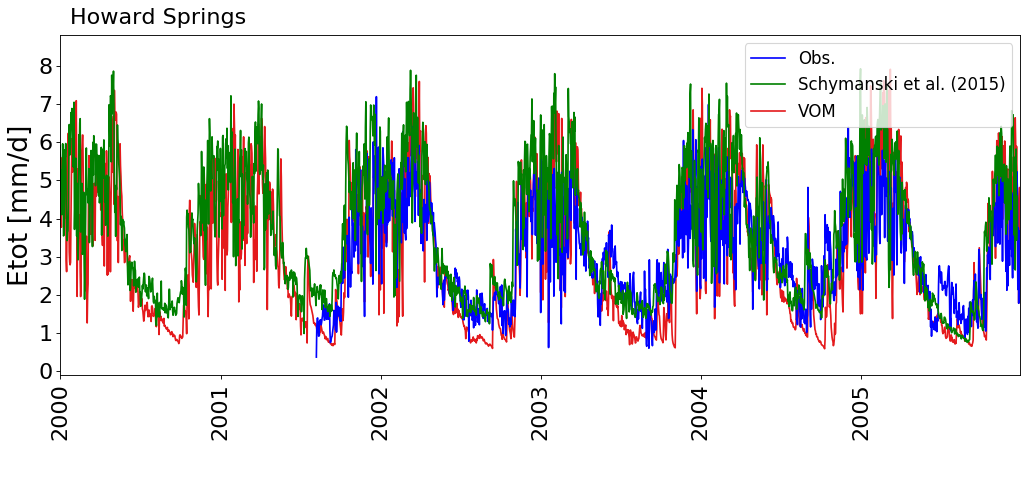

In [87]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v evaptot --var2015 evaptot -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Etot [mm/d]" --labels VOM \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 \
--title "Howard Springs" --legend True \
--palette Set1

**Figure S1.14**. Comparison for Howard Springs between the result of Schymanski et al. (2015) (green) and new runs (red), for the total evaporation, with observations in blue. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. 

## Soil evaporation

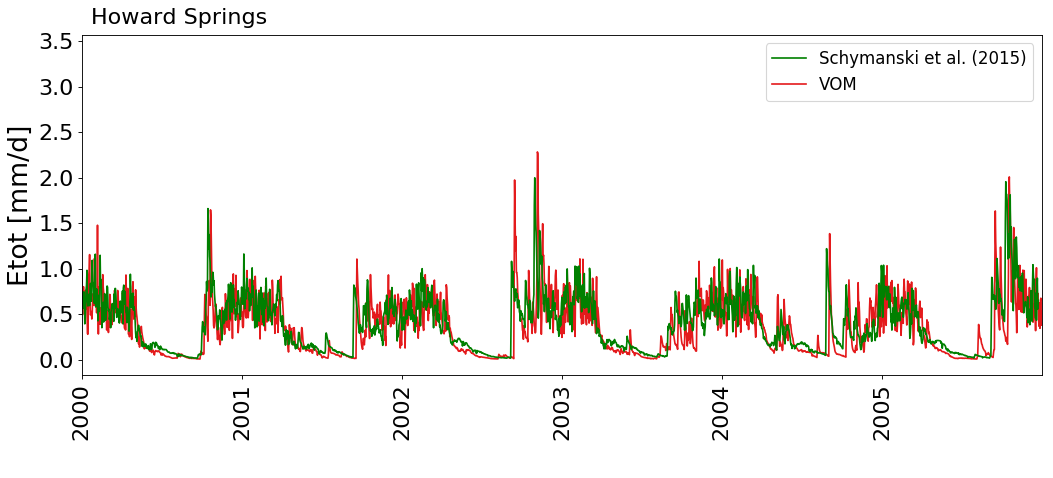

In [88]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v esoil --var2015 esoil -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Etot [mm/d]" --labels VOM \
--mf 1000 \
--title "Howard Springs" --legend True \
--palette Set1

**Figure S1.15**. Comparison for Howard Springs between the result of Schymanski et al. (2015) (green) and new runs (red) for the soil evaporation.

## Tree transpiration

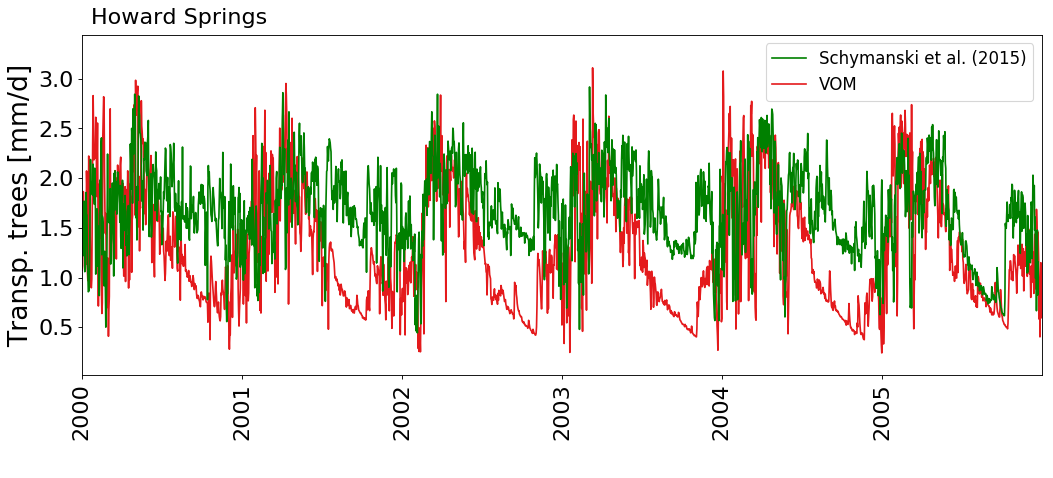

In [89]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v etmt --var2015 etm_t -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Transp. trees [mm/d]" --labels VOM \
--labels "VOM" "jmax25t max asst" --legend True\
--title "Howard Springs" --palette Set1 \
--mf 1000 

**Figure S1.16**. Comparison for Howard Springs between the result of Schymanski et al. (2015) (green) and new runs (red) for the tree transpiration.

## Grass transpiration

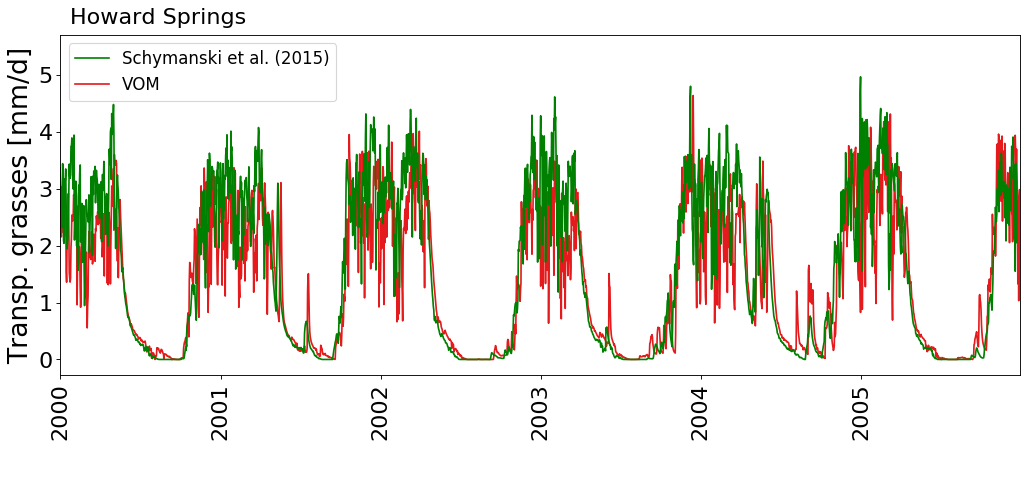

In [90]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v etmg --var2015 etm_g -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Transp. grasses [mm/d]" --labels VOM \
--mf 1000 \
--title "Howard Springs" --legend True \
--palette Set1

**Figure S1.17**. Comparison for Howard Springs between the result of Schymanski et al. (2015) (green) and new runs (red) for the grass transpiration.

## Total assimilation

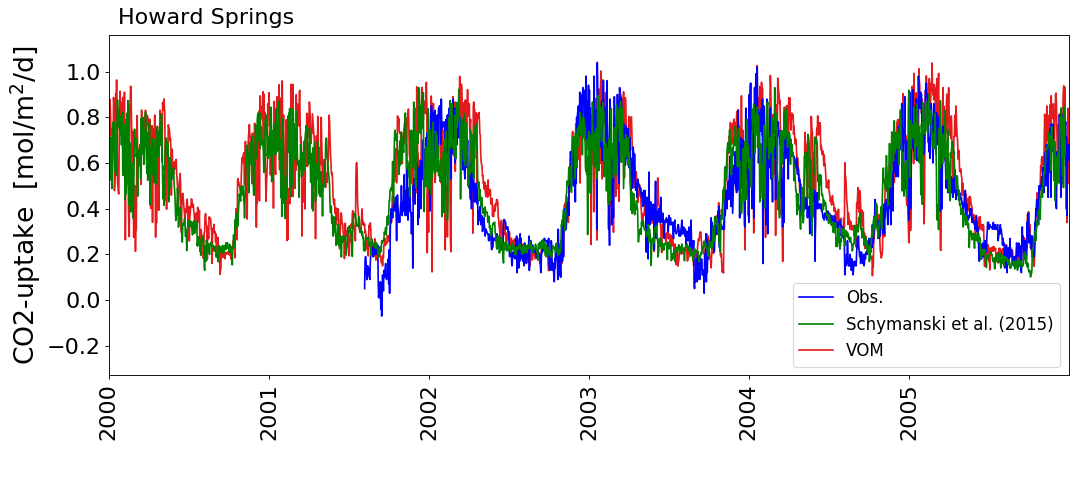

In [91]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v asstot --var2015 asstot -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "CO2-uptake  [mol/m$^2$/d]" --labels VOM \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 \
--title "Howard Springs" --legend True \
--palette Set1

**Figure S1.18**. Comparison for Howard Springs between the result of Schymanski et al. (2015) (green) and new runs (red) for the total CO2-uptake, with observations in blue.

## Assimilation trees

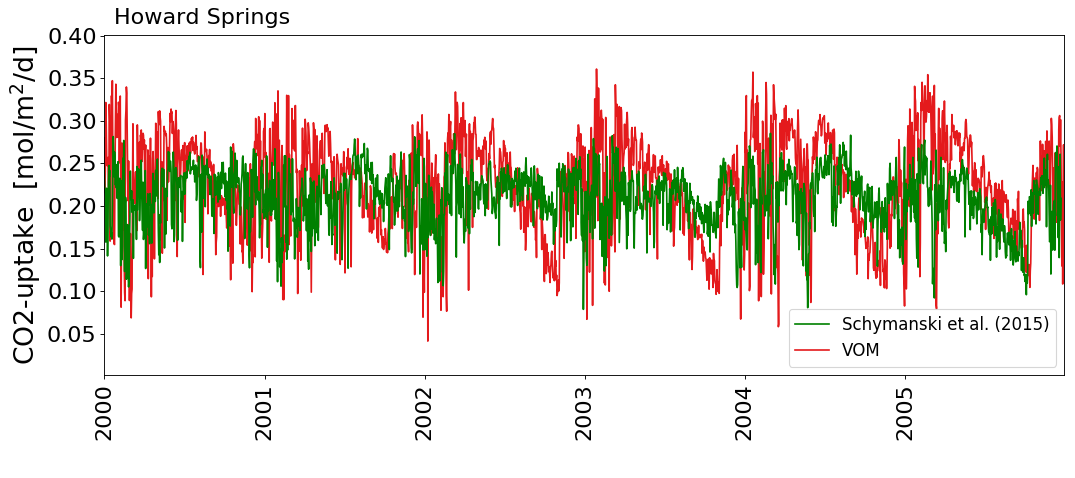

In [93]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v asst --var2015 ass_t -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "CO2-uptake  [mol/m$^2$/d]" --labels VOM \
--title "Howard Springs" --legend True \
--palette Set1

**Figure S1.19**. Comparison for Howard Springs between the result of Schymanski et al. (2015) (green) and new runs (red) for the CO2-uptake of the trees.

## Assimilation grasses

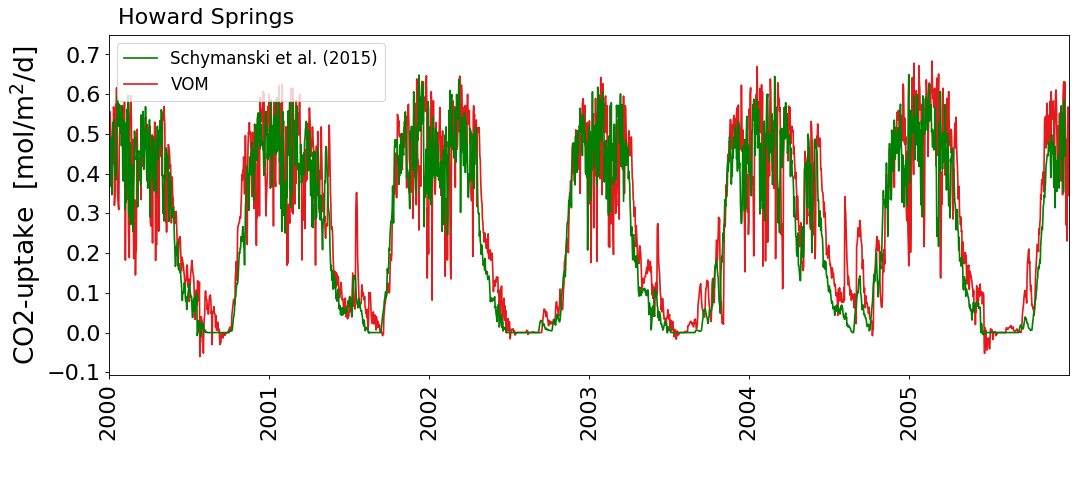

In [94]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v assg --var2015 ass_g -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "CO2-uptake  [mol/m$^2$/d]" --labels VOM \
--title "Howard Springs" --legend True \
--palette Set1

**Figure S1.20**. Comparison for Howard Springs between the result of Schymanski et al. (2015) (green) and new runs (red) for the total CO2-uptake of the grasses.

## Water storage

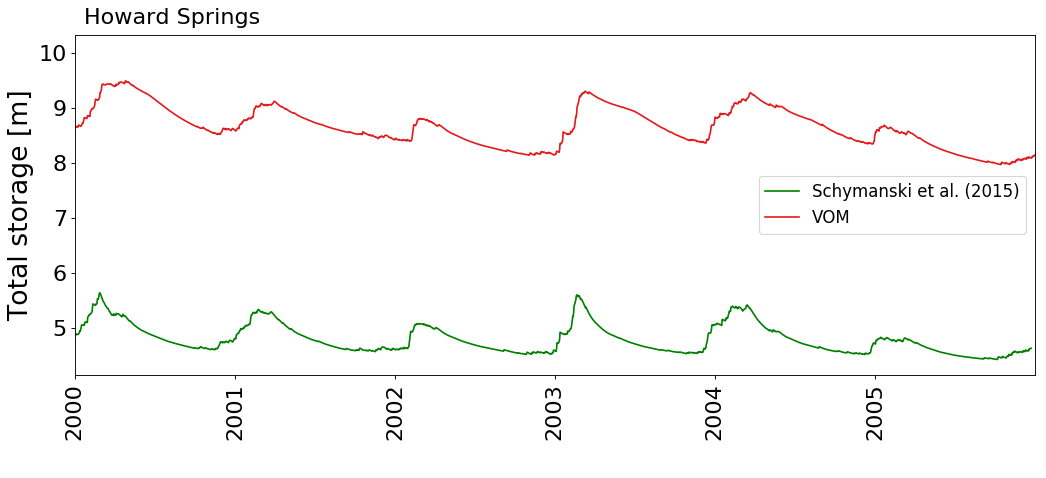

In [96]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v ws --var2015 ws -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Total storage [m]" \
--labels "VOM" "Schymanski et al. 2015" --legend True \
--title "Howard Springs" --palette Set1 

**Figure S1.21**. Comparison for Howard Springs between the result of Schymanski et al. (2015) (green) and new runs (red) for the total water storage in the soil profile.

## Soil moisture profile

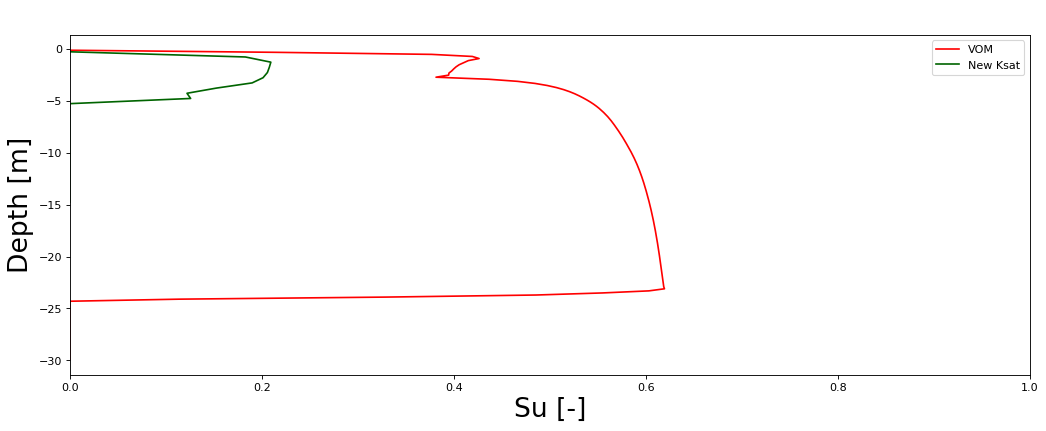

In [98]:
#soil moisture profile
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
-d 0.20 0.50 \
-cz 30 15 -nd 3650 --ylabel "Depth [m]" --xlabel "Su [-]" --cbar_min 0.10 --cbar_max 1.00 \
--cblabel "Layer thickness [m]" --plot_cbar 0 --xlim 0 1 \
--label "VOM" "New Ksat" "Schymanski et al. 2015"  \
--colors "red" "darkgreen"



**Figure S1.22**. Comparison for Howard Springs between the result of Schymanski et al. (2015) (green) and new runs (red) for the average soil moisture profile.

## Groundwater

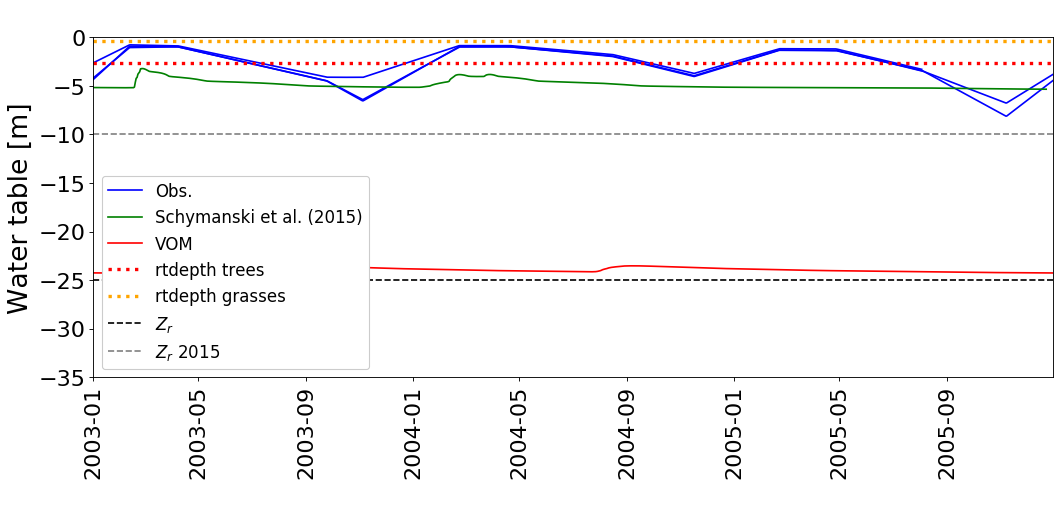

In [99]:
#plot groundwater tables
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt\
--depth True -ys 2003 -ye 2005 \
--ylabel "Water table [m]"  \
--labels VOM \
--colors "red" \
--i_cz 30  \
--i_zr 5 \
--i_cz2015 15 \
--i_zr2015 5 \
--obs ../../data/boreholes/RN030982.csv \
../../data/boreholes/RN030983.csv \
../../data/boreholes/RN030984.csv \
--pars ../../work/HowardSprings/freedrainage_cpcff1.0/best/input/pars.txt \
--legend True --xloc_title -0.05 --size_title 24 \
--ylim -35 0

**Figure S1.23**. Groundwater depths for Howard Springs. Dashed lines represent the drainage level, dotted lines the rooting depths (trees in red and grasses in orange), the VOM-results are shown in red, the results of Schymanski et al. (2009) in green, whereas the observations are shown in blue.

## Vegetation cover

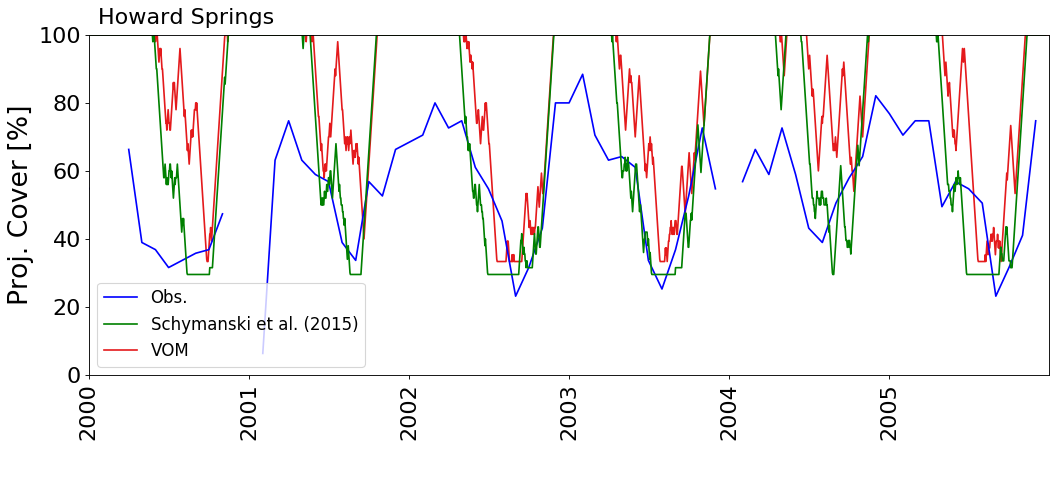

In [100]:
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v pc --var2015 pc -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_howard_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 \
--title "Howard Springs" --legend True \
--palette Set1


**Figure S1.24**. Projective cover for Howard Springs with the VOM-results in red, the results of Schymanski et al. (2009) in green, whereas the remotely sensed observations (fPar-based) are shown in blue.

## Tree electron transport capacity

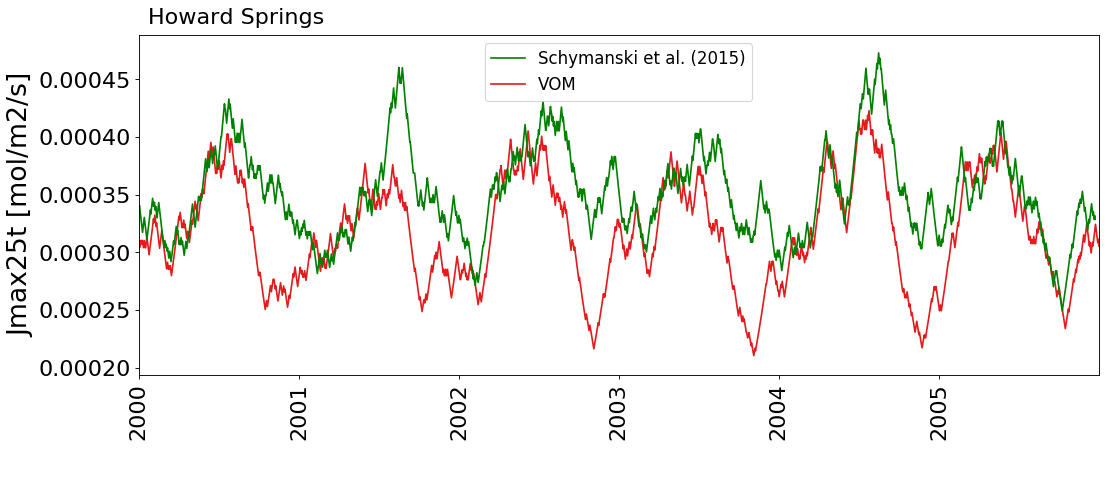

In [59]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v jmax25t --var2015 jmax25_t -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Jmax25t [mol/m2/s]" \
--labels "VOM" "jmax25t max asst" --legend True\
--title "Howard Springs" --palette Set1 

**Figure S1.25**. Electron transport capacities for the trees at Howard Springs with the VOM-results in red, and the results of Schymanski et al. (2009) in green.

## Grass electron transport capacity

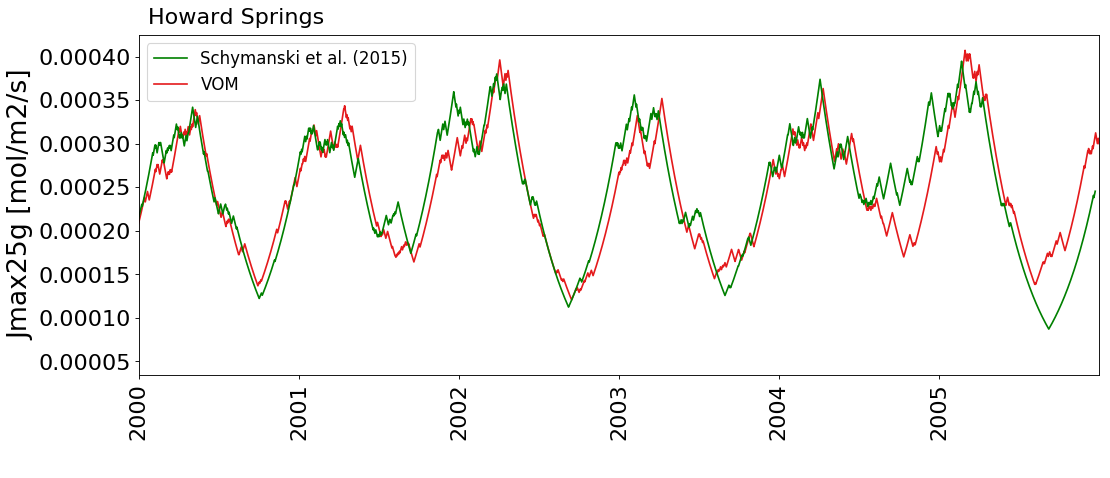

In [101]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v jmax25g --var2015 jmax25_g -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Jmax25g [mol/m2/s]" \
--labels VOM --legend True\
--title "Howard Springs" --palette Set1 

**Figure S1.26**. Electron transport capacities for grasses at Howard Springs with the VOM-results in red, and the results of Schymanski et al. (2009) in green.

## Slope assimilation and transpiration trees

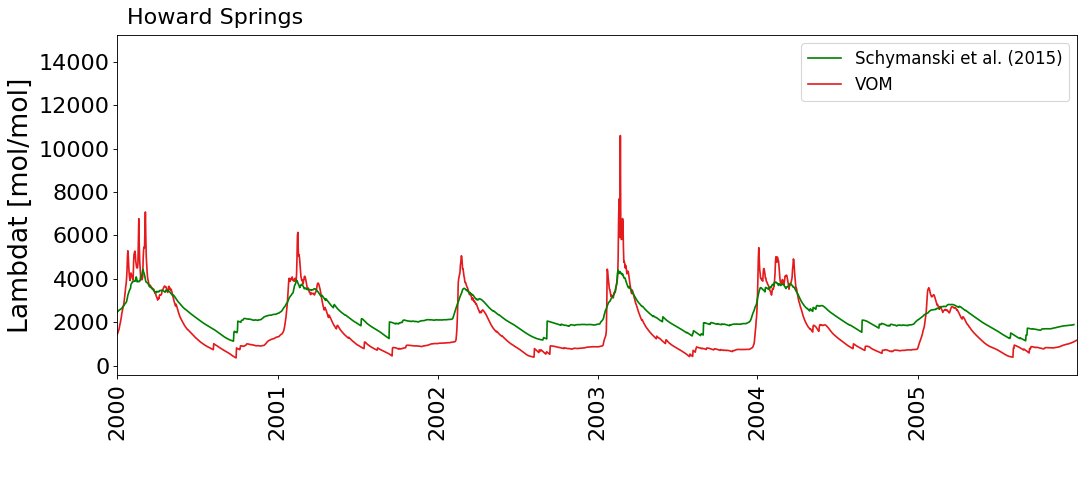

In [102]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v lambdat --var2015 lambda_t -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Lambdat [mol/mol]" \
--labels "VOM" --legend True\
--title "Howard Springs" --palette Set1 

**Figure S1.27**. Daily slope between assimilation and transpiration of the trees at Howard Springs with the VOM-results in red, and the results of Schymanski et al. (2009) in green.

## Slope assimilation and transpiration grasses

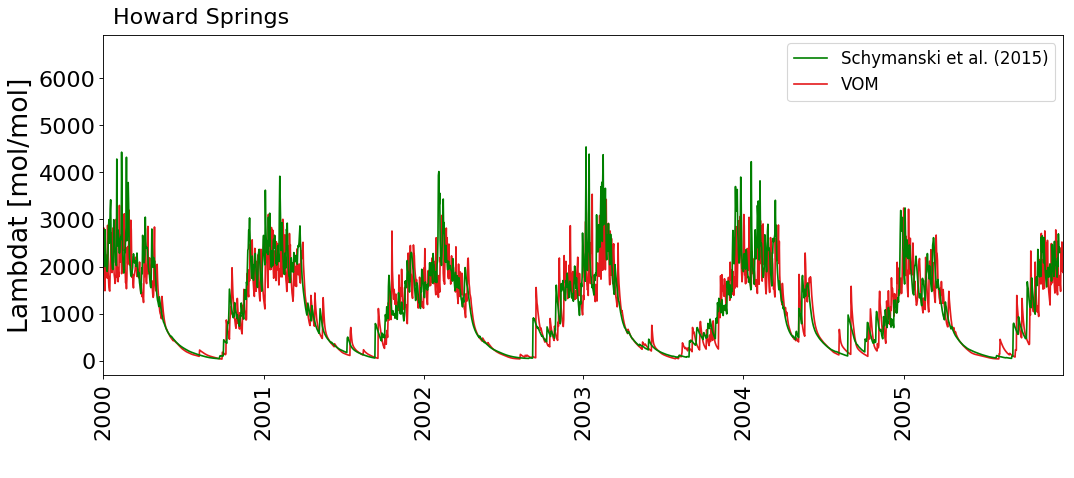

In [103]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v lambdag --var2015 lambda_g -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Lambdat [mol/mol]" \
--labels "VOM" --legend True\
--title "Howard Springs" --palette Set1 

**Figure S1.28**. Daily slope between assimilation and transpiration of the grasses at Howard Springs with the VOM-results in red, and the results of Schymanski et al. (2009) in green.